In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =  pd.read_csv ("power plant.csv")

In [3]:
data

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Problem Statement:
### Description

##### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

###  Key attributes of the database
#### The database includes the following indicators:

 `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

In [5]:
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [6]:
data.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                  source  \
902        Central Electricity Authority   
903  Karnataka Power Corporation Limited   
904                                  CDM   
905                   Hindustan Zinc ltd   
906                                  CDM   

                                                   url geolocation_source  \
902                             http://www.cea.nic.in/                WRI   
903                          http://karnatakapower.com     Industry About   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...                WRI   
905                           http://www.hzlindia.com/                WRI   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...                WRI   

     wepp_id  year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
902      NaN                 2019.0                  NaN                  NaN   
903      NaN                    NaN                  NaN                  NaN   
904      NaN                    NaN                  NaN                  NaN   
905      NaN                    NaN                  NaN                  NaN   
906      NaN                    NaN                  NaN                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
902             0.994875            233.59665                865.4   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN

In [7]:
data.sample(10)

country country_long                   name   gppd_idnr  capacity_mw  \
303     IND        India       Jodiya Wind Farm  WRI1026082        33.00   
325     IND        India                 KARGIL  IND0000183         3.75   
528     IND        India         NEPANAGAR MILL  WRI1020008        12.27   
280     IND        India      INDRA GANDHI STPP  IND0000154      1500.00   
98      IND        India               BINJKOTE  IND0000527       600.00   
266     IND        India  HZL Parewar Wind Farm  WRI1026094        27.30   
624     IND        India          RAICHUR STEEL  WRI1019929        35.00   
823     IND        India   TVS Kunnur Wind Farm  WRI1026758         9.35   
226     IND        India                 GHANVI  IND0000127        22.50   
329     IND        India     KASHANG INTEGRATED  IND0000517       195.00   

     latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
303   22.7532    70.3961         Wind         NaN         NaN          NaN   
325   34.5605    76.1299        Hydro         NaN         NaN          NaN   
528   21.4504    76.4014         Coal         NaN         NaN          NaN   
280   28.4849    76.3754         Coal         Oil         NaN          NaN   
98    22.0103    83.2058         Coal         Oil         NaN          NaN   
266   27.2492    70.6722         Wind         NaN         NaN          NaN   
624   16.3027    77.3608         Coal         NaN         NaN          NaN   
823    9.9438    77.5077         Wind         NaN         NaN          NaN   
226   31.5425    77.7786        Hydro         NaN         NaN          NaN   
329       NaN        NaN        Hydro         NaN         NaN          NaN   

     commissioning_year                  owner                         source  \
303                 NaN                    NaN                            CDM   
325              1995.0                    NaN  Central Electricity Authority   
528                 NaN     National And paper             National And paper   
280              2011.0                    NaN  Central Electricity Authority   
98               2017.0                    NaN  Central Electricity Authority   
266                 NaN                    NaN                            CDM   
624                 NaN  Surana Industries ltd          Surana Industries ltd   
823                 NaN     TVS Energy limited                            CDM   
226              2000.0                    NaN  Central Electricity Authority   
329              2016.0                    NaN  Central Electricity Authority   

                                                   url geolocation_source  \
303  https://cdm.unfccc.int/filestorage/d/d/56KO8FQ...                WRI   
325                             http://www.cea.nic.in/                WRI   
528  http://www.epw.in/journal/1962/42/chair-uncate...                WRI   
280                             http://www.cea.nic.in/                WRI   
98                              http://www.cea.nic.in/                WRI   
266  https://cdm.unfccc.int/filestorage/x/_/BYO3D0N...                WRI   
624                          http://www.suranaind.com/                WRI   
823  https://cdm.unfccc.int/Projects/DB/BVQI1331114...                WRI   
226                             http://www.cea.nic.in/                WRI   
329                             http://www.cea.nic.in/                WRI   

     wepp_id  year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
303      NaN                    NaN                  NaN                  NaN   
325      NaN                 2019.0                  NaN                  NaN   
528      NaN                    NaN                  NaN                  NaN   
280      NaN                 2019.0                  NaN             6587.527   
98       NaN                 2019.0                  NaN                  NaN   
266      NaN                    NaN                  NaN                  NaN   
6

In [8]:
data.shape

(907, 27)

In [9]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# checking total count

In [10]:
data["other_fuel1"].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [11]:
data["country"].value_counts()

IND    907
Name: country, dtype: int64

In [12]:
data["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [13]:
data["name"].value_counts()

ACME Solar Tower                                                   1
RAICHUR                                                            1
PRYAGRAJ (BARA) TPP                                                1
PULICHINTALA                                                       1
PUNE MILL                                                          1
PURULIA PSS                                                        1
PYKARA                                                             1
PYKARA ALIMATE                                                     1
Panandhro Solar Power Plant                                        1
Patan Taluka Wind Farm                                             1
Patnaik Hatti Wind Farm                                            1
Patnaik Jamnagar Wind Farm                                         1
Patodi Solar Power Plant                                           1
Phagi Solar Power Plant                                            1
Pokhran FVE Solar Power Plant     

## #name of power plant shows no common names 

In [14]:
data["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
IND0000347    1
IND0000348    1
IND0000349    1
WRI1026180    1
WRI1026663    1
WRI1026750    1
WRI1026751    1
WRI1026181    1
WRI1026182    1
WRI1026183    1
WRI1026184    1
WRI1026673    1
WRI1026788    1
WRI1026792    1
WRI1026791    1
WRI1026185    1
WRI1026186    1
WRI1026187    1
IND0000350    1
IND0000351    1
WRI1019896    1
IND0000354    1
IND0000345    1
IND0000344    1
IND0000343    1
IND0000329    1
IND0000319    1
IND0000320    1
IND0000321    1
IND0000323    1
IND0000324    1
IND0000325    1
IND0000326    1
WRI1019954    1
IND0000540    1
IND0000327    1
IND0000328    1
WRI1020017    1
IND0000342    1
IND0000330    1
IND0000331    1
IND0000333    1
IND0000334    1
IND0000335    1
IND0000336    1
IND0000337    1
IND0000338    1
IND0000339    1
IND0000340    1
IND0000341    1
IND0000355    1
WRI1019929    1
IND0000534    1
IND0000357    1
IND0000381    1
WRI1026679    1
IND0000352    1
IND00003

## 10 or 12 character identifier for the power plant
## this data is not  so useful

In [15]:
data["capacity_mw"].value_counts()

5.000       39
10.000      22
600.000     20
15.000      20
1200.000    19
20.000      18
1.000       18
30.000      16
50.000      15
100.000     14
60.000      13
500.000     12
300.000     11
24.000      11
25.000      11
120.000     10
16.000       9
36.000       9
1000.000     9
3.000        8
12.000       8
40.000       8
6.000        8
9.000        8
10.500       7
1320.000     7
250.000      7
50.400       7
90.000       7
75.000       7
240.000      7
16.500       6
2.000        6
21.000       6
150.000      6
4.000        6
270.000      5
35.000       5
18.000       5
45.000       5
22.500       5
22.000       5
750.000      4
11.200       4
80.000       4
1500.000     4
540.000      4
25.500       4
630.000      4
440.000      4
125.000      4
330.000      4
26.000       4
96.000       4
1050.000     4
2000.000     4
135.000      4
1340.000     4
6.600        3
4.500        3
28.000       3
160.000      3
420.000      3
800.000      3
1980.000     3
180.000      3
46.000    

In [16]:
data["latitude"].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
10.3118    2
15.2615    2
15.1839    2
16.5697    2
11.7696    2
17.4999    2
23.4639    2
29.7303    2
14.2352    2
8.7635     2
15.2761    2
31.2680    2
25.5177    2
14.2133    2
17.6219    2
27.4137    2
19.9817    2
11.5484    2
16.7739    1
18.2417    1
23.1975    1
9.9855     1
23.1897    1
23.2478    1
23.6788    1
26.7874    1
26.5653    1
17.2684    1
21.1902    1
26.8022    1
26.0748    1
22.0983    1
28.1839    1
25.1960    1
29.9274    1
8.7065     1
20.7147    1
31.7398    1
18.9057    1
27.2387    1
25.5124    1
18.8685    1
11.3646    1
18.8834    1
22.2454    1
18.6814    1
16.3328    1
17.0853    1
21.4813    1
14.6859    1
9.6266     1
20.8986    1
18.9766    1
31.9667    1
23.3682    1
28.7962    1
28.6146    1
9.0198     1
16.4072    1
23.9151    1
18.7695    1
14.7040    1
15.3771    1
21.2759    1
24.0270    1
24.1778    1
28.7327    1
25.1732    1
23.6260    1
31.0417    1
27.8180    1
18.7572    1

In [17]:
data["longitude"].value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
76.6622    2
74.5268    2
76.6011    2
74.7673    2
79.3389    2
78.1753    2
76.3379    2
75.7810    2
75.3099    2
80.3257    2
75.6189    2
80.0838    2
80.6936    2
72.2242    2
76.6170    2
73.8896    2
92.6679    2
76.3188    2
77.8138    2
72.1577    2
75.1661    2
76.4920    2
87.1311    2
74.3795    1
70.2729    1
72.2677    1
75.5622    1
72.0078    1
72.0099    1
76.5254    1
78.2563    1
70.5948    1
76.6045    1
77.5777    1
77.4501    1
70.7432    1
71.9424    1
74.5460    1
78.7588    1
75.5794    1
70.6216    1
82.7246    1
73.1814    1
75.9469    1
71.4693    1
77.1905    1
77.0706    1
77.2528    1
77.7036    1
81.6594    1
77.7147    1
80.0525    1
74.1234    1
74.7531    1
86.0970    1
79.2086    1
68.7653    1
82.1283    1
73.4948    1
78.0415    1
73.8368    1
73.2407    1
81.8525    1
73.9616    1
86.6610    1
85.0355    1
82.7915    1
83.0361    1
77.1016    1
75.8320    1
91.1948    1
76.5847    1

In [18]:
data["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [19]:
data["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [20]:
data["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [21]:
data["commissioning_year"].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
2014.0    17
2017.0    16
2002.0    16
2000.0    16
2001.0    15
2011.0    13
1993.0    13
1996.0    13
1999.0    13
1995.0    12
1992.0    11
2003.0    10
1984.0    10
2005.0    10
1991.0    10
2009.0    10
1994.0    10
2006.0    10
2007.0    10
1998.0     9
2004.0     9
1990.0     9
2008.0     9
1997.0     8
1987.0     8
1979.0     7
1988.0     7
1980.0     6
1986.0     6
1989.0     6
2018.0     6
1970.0     5
1957.0     5
1975.0     4
1966.0     4
1978.0     4
1985.0     4
1983.0     4
1981.0     4
1976.0     4
1961.0     3
1963.0     3
1960.0     3
1977.0     3
1968.0     3
1973.0     3
1962.0     3
1965.0     2
1967.0     2
1952.0     2
1974.0     2
1982.0     2
1964.0     2
1955.0     2
1971.0     2
1972.0     2
1943.0     1
1927.0     1
1939.0     1
1969.0     1
1954.0     1
1959.0     1
1958.0     1
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, dtype: int64

In [22]:
data["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
Karnataka Power Corporation Limited                            3
Government of India                                            3
Enercon India Ltd.                                             3
Shree Naman Developers Ltd.                                    3
Ujaas Energy Limited                                           3
Hindustan Zinc ltd                                             3
Powerica Limited                                               3
Shri Ssk ltd                                                   3
Tata Power Solar Systems Limited (TPREL)                       3
Shree Sugars ltd                                               3
Maharashtra State Power G

In [23]:
data["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Hindustan Zinc ltd                                               3
PEDA                                                             3
Solairedirect                                                    3
Karnataka Power Corporation Limited                           

In [24]:
data["url"].value_counts()

http://www.cea.nic.in/                                                                                                                                                                                                                            519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                                                                                                                     7
http://www.ntpc.co.in                                                                                                                                                                                                                               6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                                                                                                                    5
http://www.mahau

In [25]:
data["geolocation_source"].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [26]:
data["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [27]:
data["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [28]:
data["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [29]:
data["generation_gwh_2014"].value_counts()

0.000000        28
617.789264       1
359.139800       1
7368.390000      1
9983.018000      1
11.472450        1
379.413400       1
6945.000000      1
365.194850       1
38.805000        1
1401.805750      1
223.526750       1
1799.976000      1
2156.080000      1
150.264900       1
1320.723200      1
12.805650        1
2.205850         1
524.922200       1
388.179350       1
160.872800       1
2042.340000      1
34.655850        1
20.242750        1
82.117350        1
5673.374000      1
5380.267100      1
173.111100       1
7847.420000      1
5260.710000      1
416.230000       1
571.358850       1
19784.000000     1
738.747700       1
12.214000        1
6420.386000      1
0.045355         1
215.210000       1
1853.486000      1
326.041600       1
1103.932600      1
1310.982150      1
236.163250       1
1153.897230      1
268.480850       1
5373.910000      1
4079.525000      1
657.476100       1
608.611650       1
3193.101000      1
6803.312500      1
3730.102000      1
341.583500  

In [30]:
data["generation_gwh_2015"].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
515.509500       1
7612.000000      1
279.157200       1
56.605550        1
1059.237200      1
219.519300       1
30.267900        1
1836.114800      1
115.987150       1
158.901500       1
1726.086200      1
454.954000       1
502.256100       1
376.617450       1
2702.500000      1
25.501850        1
1144.014052      1
6039.880000      1
639.785000       1
4663.180000      1
588.740000       1
38.212250        1
36.755300        1
701.027250       1
18990.000000     1
356.966000       1
6434.000000      1
3600.700000      1
466.770000       1
373.045400       1
19628.000000     1
596.462700       1
6532.615000      1
1150.497000      1
218.930000       1
1947.483650      1
343.543650       1
1273.848750      1
1973.492950      1
252.501150       1
1459.399526      1
500.017350       1
7262.500572      1
4389.560900      1
3175.473000      1
173.428500       1
1165.314150      1
1513.720000 

In [31]:
data["generation_gwh_2016"].value_counts()

0.000000        30
8470.570000      2
1511.000000      2
886.004428       1
90.644500        1
191.587250       1
12.676300        1
1101.435150      1
12.935000        1
4004.000000      1
210.930050       1
1759.182000      1
1973.374000      1
1363.080350      1
446.536100       1
74.913550        1
216.621274       1
93.440450        1
358.339300       1
4076.980000      1
23.830250        1
1420.412000      1
5474.150000      1
679.067600       1
2681.166000      1
6684.600000      1
1831.840000      1
62.018350        1
1299.549600      1
403.960000       1
7270.280000      1
2508.110000      1
434.180000       1
564.403800       1
20486.000000     1
550.792200       1
6020.848700      1
4472.098000      1
344.356238       1
345.404300       1
10503.882000     1
1242.764950      1
1950.617900      1
247.177900       1
1367.924230      1
180.035300       1
8952.470000      1
3574.234900      1
61.948700        1
687.880000       1
4045.104000      1
66.207300        1
132.842450  

In [32]:
data["generation_gwh_2017"].value_counts()

0.000000        32
170.085300       2
663.774500       1
1632.367150      1
272.739450       1
0.975100         1
1009.298150      1
6.567000         1
5155.986000      1
216.313000       1
1908.437000      1
2844.507400      1
116.156300       1
35.511550        1
2327.900000      1
160.528200       1
285.664500       1
158.732350       1
3805.590000      1
26.974450        1
2737.058000      1
5795.848000      1
706.977350       1
2810.625000      1
114.703600       1
7720.620000      1
376.368700       1
2103.823900      1
1794.402900      1
421.720000       1
7090.900000      1
2068.276000      1
406.760000       1
829.611100       1
22019.000000     1
758.796950       1
6216.638100      1
4418.715000      1
641.872000       1
344.180450       1
9833.690000      1
1409.656300      1
2004.925000      1
121.857650       1
1391.014850      1
249.386800       1
8647.430000      1
4404.532000      1
57.918950        1
1242.190000      1
3801.420000      1
128.822650       1
187.448050  

In [33]:
data["generation_gwh_2018"].value_counts()

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
7200.400000      1
164.175000       1
1479.422000      1
3476.199100      1
94.127000        1
1504.997200      1
31.541500        1
475.900000       1
699.485000       1
130.951950       1
3942.920000      1
45.710300        1
2536.151470      1
4505.330000      1
345.409673       1
605.258500       1
2354.107000      1
120.305450       1
114.017050       1
3075.090000      1
21.939750        1
7195.060000      1
184.323750       1
1046.590750      1
1572.830000      1
437.550000       1
558.901450       1
21253.624000     1
833.700550       1
5949.706000      1
4378.709000      1
689.008000       1
1447.247400      1
347.344550       1
1819.626150      1
332.648400       1
235.745350       1
955.565050       1
187.199300       1
8658.170000      1
3614.794110      1
79.619900        1
2566.800000      1
3002.607000      1
8065.380000      1
2990.033500      1
79.391050        1
4515.954800 

In [34]:
data["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

# checking for unique values 

In [35]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

## above shows the total number  of  unique values in each  cloumn #

# checking data type 

In [36]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

### we have a mix of object  and float variables

#  checking for null values  

<AxesSubplot:>

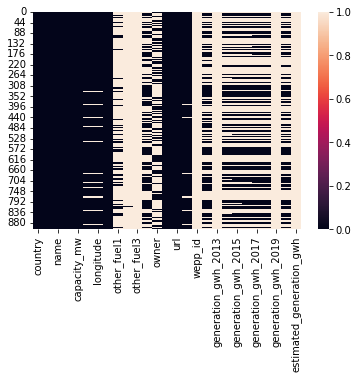

In [37]:
sns.heatmap(data.isnull() )

In [38]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


###  columns with null values and there count are  :

#### latitude               :        46
#### longitude              :      46
#### other_fuel2            :     906
#### other_fuel3             :    907
#### commissioning_year   :       380
#### owner                 :      565
#### geolocation_source  :         19
#### wepp_id               :      907
####  year_of_capacity_data  :     388
####  generation_gwh_2013    :     907
#### generation_gwh_2014      :   509
#### generation_gwh_2015      :   485
#### generation_gwh_2016      :   473
####  generation_gwh_2017     :    467
#### generation_gwh_2018      :   459
#### generation_gwh_2019     :    907
#### generation_data_source  :    458
#### estimated_generation_gwh  :  907

# working   out null  values 

In [39]:

#  changing nan values with mean 

In [40]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [41]:
data["latitude"]  = imp.fit_transform(data["latitude"].array.reshape(-1,1))

In [42]:
data["longitude"] = imp.fit_transform(data["longitude"].array.reshape(-1,1))

In [43]:
data["other_fuel1"] = imp_cat.fit_transform(data["other_fuel1"].array.reshape(-1,1))


In [44]:
data["other_fuel2"] = imp_cat.fit_transform(data["other_fuel1"].array.reshape(-1,1))
# converting nan values to mean of column  other_fuel1

In [45]:
data["other_fuel3"] = imp_cat.fit_transform(data["other_fuel1"].array.reshape(-1,1))
# converting nan values to mean of column  other_fuel1

In [46]:
data["commissioning_year"] = imp.fit_transform(data["commissioning_year"].array.reshape(-1,1))

In [47]:
data["owner"] = imp_cat.fit_transform(data["owner"].array.reshape(-1,1))


In [48]:
data["geolocation_source"] = imp_cat.fit_transform(data["geolocation_source"].array.reshape(-1,1))

In [49]:
data["year_of_capacity_data"]  = imp.fit_transform(data["year_of_capacity_data"].array.reshape(-1,1))

In [50]:
data["generation_gwh_2014"]  = imp.fit_transform(data["generation_gwh_2014"].array.reshape(-1,1))

In [51]:
data["generation_gwh_2015"]  = imp.fit_transform(data["generation_gwh_2015"].array.reshape(-1,1))

In [52]:
data["generation_gwh_2016"]  = imp.fit_transform(data["generation_gwh_2016"].array.reshape(-1,1))

In [53]:
data["generation_gwh_2017"]  = imp.fit_transform(data["generation_gwh_2017"].array.reshape(-1,1))

In [54]:
data["generation_gwh_2018"]  = imp.fit_transform(data["generation_gwh_2018"].array.reshape(-1,1))

In [55]:
data["generation_data_source"]  = imp_cat.fit_transform(data["generation_data_source"].array.reshape(-1,1))

### null column are not filled with the mean and mode 

# droping completely   nan  columns

In [56]:

data.drop(["wepp_id" , "generation_gwh_2013" , "generation_gwh_2019" , "estimated_generation_gwh"] , axis = 1 , inplace = True)

In [57]:
data.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
other_fuel3               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   other_fuel2             907 non-null    object 
 10  other_fuel3             907 non-null    object 
 11  commissioning_year      907 non-null    float64
 12  owner                   907 non-null    object 
 13  source                  907 non-null    object 
 14  url                     907 non-null    ob

# all null values have been  cleared                                                                                                                                                                                                                                                                                                                                                                    

<AxesSubplot:>

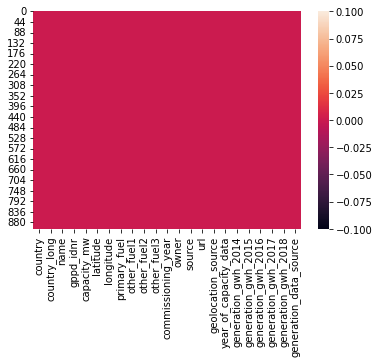

In [59]:
sns.heatmap(data.isnull())

In [60]:
data

country country_long                                               name  \
0       IND        India                                   ACME Solar Tower   
1       IND        India                                ADITYA CEMENT WORKS   
2       IND        India                           AES Saurashtra Windfarms   
3       IND        India                                        AGARTALA GT   
4       IND        India                                       AKALTARA TPP   
5       IND        India                                       AKRIMOTA LIG   
6       IND        India                                             ALIYAR   
7       IND        India                                    ALLAIN DUHANGAN   
8       IND        India                                        ALMATTI DAM   
9       IND        India                                        AMAR KANTAK   
10      IND        India                                      AMARAVATI TPP   
11      IND        India                             ANANDPUR SAHIB ST-I&II   
12      IND        India                                        ANAPARA "C"   
13      IND        India                                             ANDHRA   
14      IND        India                                  ANOOPGARH ST I&II   
15      IND        India                                             ANPARA   
16      IND        India                                            ANTA GT   
17      IND        India                                            ANUPPUR   
18      IND        India                                         ANUPUR TPP   
19      IND        India                                  ARVINDNAGAR SUGAR   
20      IND        India                                    ASHOKNAGAR MILL   
21      IND        India                                       ATHANI SUGAR   
22      IND        India                                         AURAIYA GT   
23      IND        India                                AVANTHA BHANDAR TPP   
24      IND        India                               AWARPUR CEMENT PLANT   
25      IND        India                                           Abhijeet   
26      IND        India                          Amarsar Solar Power Plant   
27      IND        India                                  Anabura Wind Farm   
28      IND        India                Ananthapur - Meil Solar Power Plant   
29      IND        India                              Andrha Lake Wind Farm   
30      IND        India                               Anikkadavu Wind Farm   
31      IND        India                             Arasinagundi Wind Farm   
32      IND        India                 Askandra - DREPL Solar Power Plant   
33      IND        India  Askandra - Electromech Maritech Solar Power Plant   
34      IND        India              Askandra - Finehope Solar Power Plant   
35      IND        India                 Askandra - Khaya Solar Power Plant   
36      IND        India                Askandra - Newton Solar Power Plant   
37      IND        India               Askandra - Saidham Solar Power Plant   
38      IND        India                Askandra - Vasavi Solar Power Plant   
39      IND        India                                           BADARPUR   
40      IND        India                                       BAGALKOT ICP   
41      IND        India                                       BAGLIHAR HEP   
42      IND        India                                    BAGLIHAR HEP-II   
43      IND        India                                         BAIRA SIUL   
44      IND        India                                          BAKRESWAR   
45      IND        India                                          BALCO TPP   
46      IND        India                                           BALIMELA   
47      IND        India                               BALLARPUR BILT POWER   
48      IND        India                                     BAMANIA CEMENT   
49      IND        India                              

# dropping similar data columns or  irrelevant data

In [61]:

data.drop(["country_long","latitude" , "longitude","url"] , axis = 1 , inplace = True)

#   grouping categorical and numerical data

In [62]:
data_cat = data[["country","name","gppd_idnr","primary_fuel","other_fuel1","other_fuel2","other_fuel3","owner","source","geolocation_source","generation_data_source"]].copy()
data_cat

country                                               name   gppd_idnr  \
0       IND                                   ACME Solar Tower  WRI1020239   
1       IND                                ADITYA CEMENT WORKS  WRI1019881   
2       IND                           AES Saurashtra Windfarms  WRI1026669   
3       IND                                        AGARTALA GT  IND0000001   
4       IND                                       AKALTARA TPP  IND0000002   
5       IND                                       AKRIMOTA LIG  IND0000003   
6       IND                                             ALIYAR  IND0000004   
7       IND                                    ALLAIN DUHANGAN  IND0000005   
8       IND                                        ALMATTI DAM  IND0000006   
9       IND                                        AMAR KANTAK  IND0000007   
10      IND                                      AMARAVATI TPP  IND0000008   
11      IND                             ANANDPUR SAHIB ST-I&II  IND0000009   
12      IND                                        ANAPARA "C"  IND0000010   
13      IND                                             ANDHRA  IND0000011   
14      IND                                  ANOOPGARH ST I&II  IND0000012   
15      IND                                             ANPARA  IND0000013   
16      IND                                            ANTA GT  IND0000014   
17      IND                                            ANUPPUR  WRI1019996   
18      IND                                         ANUPUR TPP  IND0000015   
19      IND                                  ARVINDNAGAR SUGAR  WRI1019938   
20      IND                                    ASHOKNAGAR MILL  WRI1019939   
21      IND                                       ATHANI SUGAR  WRI1019904   
22      IND                                         AURAIYA GT  IND0000016   
23      IND                                AVANTHA BHANDAR TPP  IND0000017   
24      IND                               AWARPUR CEMENT PLANT  WRI1019940   
25      IND                                           Abhijeet  WRI1020238   
26      IND                          Amarsar Solar Power Plant  WRI1026104   
27      IND                                  Anabura Wind Farm  WRI1026069   
28      IND                Ananthapur - Meil Solar Power Plant  WRI1026105   
29      IND                              Andrha Lake Wind Farm  WRI1026768   
30      IND                               Anikkadavu Wind Farm  WRI1026347   
31      IND                             Arasinagundi Wind Farm  WRI1026068   
32      IND                 Askandra - DREPL Solar Power Plant  WRI1026106   
33      IND  Askandra - Electromech Maritech Solar Power Plant  WRI1026107   
34      IND              Askandra - Finehope Solar Power Plant  WRI1026108   
35      IND                 Askandra - Khaya Solar Power Plant  WRI1026109   
36      IND                Askandra - Newton Solar Power Plant  WRI1026110   
37      IND               Askandra - Saidham Solar Power Plant  WRI1026111   
38      IND                Askandra - Vasavi Solar Power Plant  WRI1026112   
39      IND                                           BADARPUR  IND0000019   
40      IND                                       BAGALKOT ICP  WRI1019905   
41      IND                                       BAGLIHAR HEP  IND0000020   
42      IND                                    BAGLIHAR HEP-II  IND0000021   
43      IND                                         BAIRA SIUL  IND0000022   
44      IND                                          BAKRESWAR  IND0000023   
45      IND                                          BALCO TPP  IND0000025   
46      IND                                           BALIMELA  IND0000024   
47      IND                               BALLARPUR BILT POWER  WRI1019941   
48      IND                                     BAMANIA CEMENT  WRI1019882   
49      IND                                      BANDAKHAR TPP  IND0000026   
50      IND               

In [63]:
data_num = data[["capacity_mw","commissioning_year","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]].copy()
data_num

capacity_mw  commissioning_year  year_of_capacity_data  \
0          2.500         2011.000000                 2019.0   
1         98.000         1997.091082                 2019.0   
2         39.200         1997.091082                 2019.0   
3        135.000         2004.000000                 2019.0   
4       1800.000         2015.000000                 2019.0   
5        250.000         2005.000000                 2019.0   
6         60.000         1970.000000                 2019.0   
7        192.000         2010.000000                 2019.0   
8        290.000         2004.000000                 2019.0   
9        210.000         2008.000000                 2019.0   
10      1350.000         2014.000000                 2019.0   
11       134.000         1985.000000                 2019.0   
12      1200.000         2011.000000                 2019.0   
13        16.950         1986.000000                 2019.0   
14         9.000         1987.000000                 2019.0   
15      2630.000         2000.000000                 2019.0   
16       419.330         1989.000000                 2019.0   
17       600.000         1997.091082                 2019.0   
18      1200.000         2015.000000                 2019.0   
19        10.000         1997.091082                 2019.0   
20        17.000         1997.091082                 2019.0   
21        24.000         1997.091082                 2019.0   
22       652.000         1989.000000                 2019.0   
23       600.000         2017.000000                 2019.0   
24        46.000         1997.091082                 2019.0   
25        50.000         2015.000000                 2019.0   
26         1.000         1997.091082                 2019.0   
27        16.500         1997.091082                 2019.0   
28        50.000         1997.091082                 2019.0   
29       113.600         1997.091082                 2019.0   
30        19.800         1997.091082                 2019.0   
31        13.200         1997.091082                 2019.0   
32         5.000         1997.091082                 2019.0   
33         5.000         1997.091082                 2019.0   
34         5.000         1997.091082                 2019.0   
35         5.000         1997.091082                 2019.0   
36         5.000         1997.091082                 2019.0   
37         5.000         1997.091082                 2019.0   
38         5.000         1997.091082                 2019.0   
39       705.000         1977.000000                 2019.0   
40        28.000         1997.091082                 2019.0   
41       450.000         2008.000000                 2019.0   
42       450.000         2015.000000                 2019.0   
43       180.000         1980.000000                 2019.0   
44      1050.000         2003.000000                 2019.0   
45       600.000         2015.000000                 2019.0   
46       510.000         1984.000000                 2019.0   
47        67.500         1997.091082                 2019.0   
48        10.000         1997.091082                 2019.0   
49       300.000         2015.000000                 2019.0   
50       335.000         1976.000000                 2019.0   
51        12.000         1996.000000                 2019.0   
52       315.000         1991.000000                 2019.0   
53        30.000         2002.000000                 2019.0   
54        60.000         2001.000000                 2019.0   
55        20.000         2006.000000                 2019.0   
56        20.000         1997.091082                 2019.0   
57      1200.000         2014.000000                 2019.0   
58        42.000         2006.000000                 2019.0   
59       720.000         2007.000000                 2019.0   
60        90.000         1988.000000                 2019.0   
61      1320.000         2014.000000                 2019.0   
62        90.000         2011.000000

# grouping relevant data

In [64]:
total_generation_gwh = pd.DataFrame(data["generation_gwh_2014"] + data["generation_gwh_2015"]   +  data["generation_gwh_2016"] + data["generation_gwh_2017"] + data["generation_gwh_2018"])
d = data
d["total_generation_gwh"] = total_generation_gwh
group = d.groupby(["name", "total_generation_gwh" ,"capacity_mw" ,"primary_fuel"]).size(). reset_index()
group = group.drop([0],axis = 1)
group = group.sort_values(by = ["total_generation_gwh"], axis=0, ascending=False, inplace=False, kind='quicksort')
group =group.reset_index().drop(["index"],axis = 1)
group


name  total_generation_gwh  \
0                                      VINDH_CHAL STPS         156908.000000   
1                                           SASAN UMPP         132896.000000   
2                                           MUNDRA TPP         129233.000000   
3                                          MUNDRA UMPP         122834.000000   
4                                           SIPAT STPS         108599.000000   
5                                         TALCHER STPS         107405.000000   
6                                               RIHAND         103170.624000   
7                                           KORBA STPS          95074.000000   
8                                        R_GUNDEM STPS          91646.000000   
9                                           TIRORA TPP          88252.000000   
10                                           KAHALGAON          73980.020000   
11                                      SINGRAULI STPS          69709.000000   
12                                              ANPARA          68081.833022   
13                                     CHANDRAPUR_Coal          64691.829000   
14                                            SIMHADRI          64006.000000   
15                                        FARAKKA STPS          62867.150000   
16                                             RAICHUR          48808.660000   
17                                       NEYVELI ST II          48535.581000   
18                                       DADRI (NCTPP)          48128.136000   
19                                             TARAPUR          44694.580000   
20                                          KORBA-WEST          44105.728175   
21                                         ANAPARA "C"          39537.545100   
22                                         RAJPURA TPP          38894.480572   
23                                           VIJAYWADA          37533.360000   
24                                            R.A.P.S.          36157.280000   
25                                           KAWAI TPP          35449.000000   
26                                                KOTA          35096.033000   
27                                   VALLUR ntpc/ntecl          34748.875000   
28                                       NATHPA JHAKRI          34742.225950   
29                                          K_KHEDA II          34463.754000   
30                                         K_GUDEM NEW          34173.384491   
31                                   JSW RATNAGIRI TPP          34113.290000   
32                                      MAITHON RB TPP          33904.011000   
33                                       SANJAY GANDHI          33880.326000   
34                                           BAKRESWAR          32861.509000   
35                                     ROSA TPP PH - 1          32603.150000   
36                                            UNCHAHAR          32502.000000   
37                                               KAIGA          32152.510000   
38                                         PAINAMPURAM          31994.950000   
39                                           UDUPI TPP          31754.640000   
40                                   INDRA GANDHI STPP          31372.963000   
41                                            BHUSAWAL          31333.156900   
42                                         RAYAL SEEMA          31140.193800   
43                                JALLIPPA KAPURDI TPP          30935.100000   
44                                    SEMBCORP GAYATRI          30865.536011   
45                                        BARH STPP II          30566.000000   
46                                         CHHABRA TPS          30562.472949   
47                                           WANAKBORI          30055.555000   
48                                           SURATGARH          29397.897000   
49                                           TUTIC

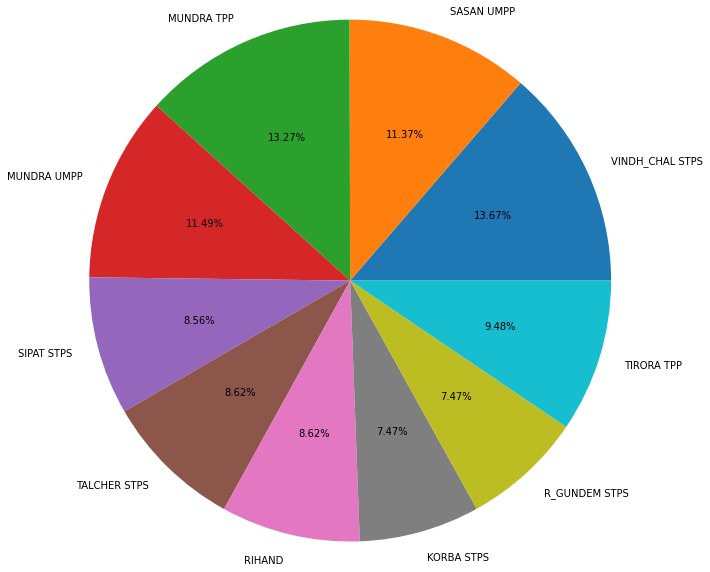

In [65]:
power_gen = group["total_generation_gwh"].values
name = group["name"].values
capacity = power_gen = group["capacity_mw"].values
plt.pie(power_gen[0:10],labels = name[0:10], autopct = "%1.2f%%" , radius = 3)
plt.show()

# most power is generated by  VINDH_CHAL STPS 

#  analysis from the above table :
## top 5 power plant according to the  highest total power generation

### power plant VINDH_CHAL STPS	 has generated a total of 156908 GWH
### SASAN UMPP	132896.000000	GWH
### MUNDRA TPP	129233.000000	GWH
### MUNDRA UMPP	122834.000000	 GWH
### SIPAT STPS	108599.000000	GWH


# Univariate analysis 

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

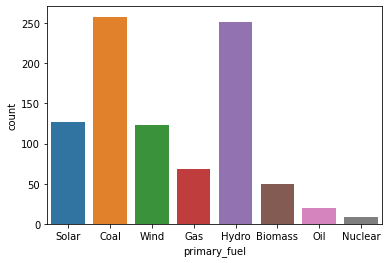

In [66]:
sns.countplot(data["primary_fuel"])

## most used fule type is coal and hydro fuel
## least used is nuclear 

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

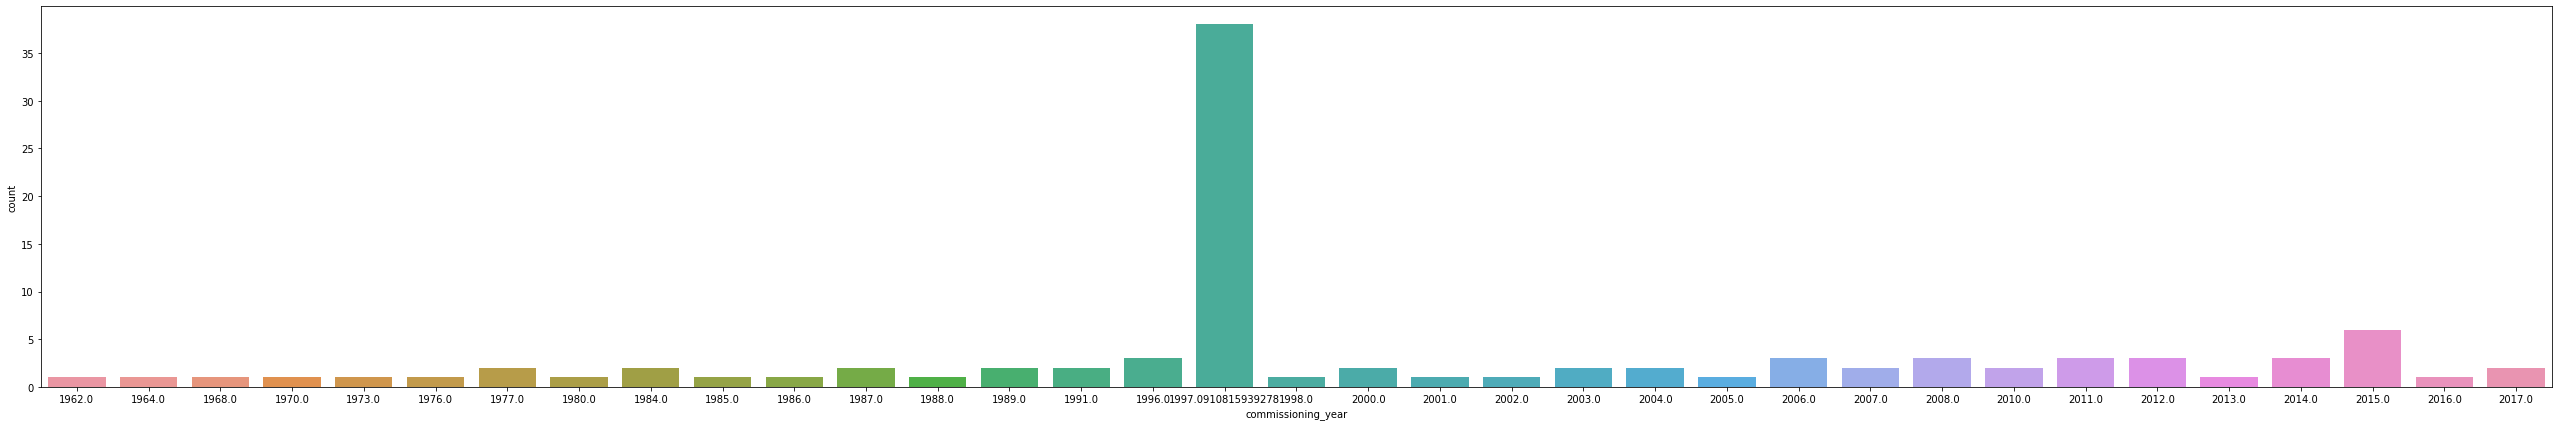

In [67]:
plt.figure(figsize = (45,7))
sns.countplot(data["commissioning_year"][0:100])


# most power plants are set up during the year 1996 to 1997
# total of   380 power plant 


False    698
True     209
Name: generation_gwh_2014, dtype: int64

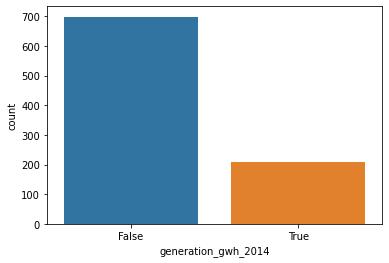

In [68]:
sns.countplot(data["generation_gwh_2014"]<1000)
(data["generation_gwh_2014"]<1000).value_counts()

# only 209 power plants generated power more than 1000gwh in 2014

False    675
True     232
Name: generation_gwh_2015, dtype: int64

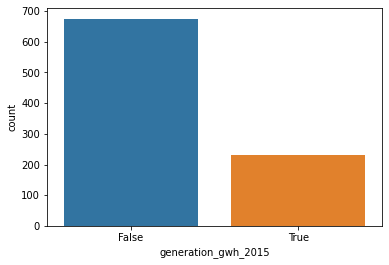

In [69]:
sns.countplot(data["generation_gwh_2015"]<1000)
(data["generation_gwh_2015"]<1000).value_counts()

# only 232  power plants generated power more than 1000gwh in  2015

False    673
True     234
Name: generation_gwh_2016, dtype: int64

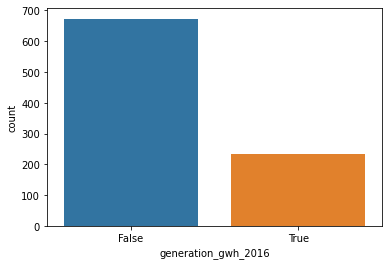

In [70]:
sns.countplot(data["generation_gwh_2016"]<1000)
(data["generation_gwh_2016"]<1000).value_counts()

False    675
True     232
Name: generation_gwh_2017, dtype: int64

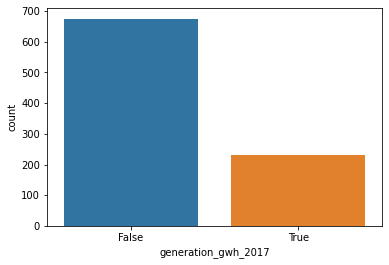

In [71]:

sns.countplot(data["generation_gwh_2017"]<1000)
(data["generation_gwh_2017"]<1000).value_counts()



### below shows the  232 power plants   names

In [72]:
df=data.query('generation_gwh_2017 < 1000')['name']
df = pd.DataFrame(df)
df = df.reset_index(drop=True)
df
# shows the plants which produce more than 1000 gwh

name
0                            AGARTALA GT
1                                 ALIYAR
2                        ALLAIN DUHANGAN
3                            ALMATTI DAM
4                 ANANDPUR SAHIB ST-I&II
5                                ANTA GT
6                             AURAIYA GT
7                    AVANTHA BHANDAR TPP
8                             BAIRA SIUL
9                           BANSAGAR (I)
10                         BANSAGAR (II)
11                        BANSAGAR (III)
12                              BARAMURA
13                               BARAUNI
14                                 BARGI
15                          BARKHERA TPP
16                       BASIN BRIDGE GT
17                                 BASSI
18                            BELLARY DG
19                                BHADRA
20                          BHANDARDHARA
21                         BHAVNAGAR TPP
22                  BHAWANI KATTALAI -II
23                 BHAWANI KATTALAI -III
24              BHAWANI KATTALAI BARRAGE
25                                 BHIRA
26                       BHIRA TAIL RACE
27                              BHIVPURI
28                              BINJKOTE
29                              BOKARO B
30                        BRAMHAPURAM DG
31                      BSES Kerala CCGT
32                                BUDHIL
33                         CHAKABURA TPP
34                              CHANJU-I
35                      CHENANI I to III
36                       CHIBRO (YAMUNA)
37                                CHILLA
38                                CHUTAK
39                             CHUZACHEN
40                         DAE RAJASTHAN
41                        DGEN MEGA CCCP
42                              DHAKRANI
43                              DHALIPUR
44                               DHOLPUR
45                         DHUVARAN CCPP
46                                DIKCHU
47                                DOYANG
48                              DURGAPUR
49                         ESSAR GT IMP.
50                            F_BAD CCGT
51                         G.I.P.C.L. GT
52                 GAMA CCPP  Module - 1
53                          GANDHI SAGAR
54                              GANGUWAL
55                          GAUTAMI CCCP
56                                  GEPL
57                           GHAT PRABHA
58                          GHATGHAR PSS
59                             GIRI BATA
60                           GODAVARI GT
61                GREL CCPP (RAJAMUNDRY)
62                                 HAMPI
63                           HASDEOBANGO
64                           HAZIRA CCCP
65                          HAZIRA-GSECL
66                          HIRAKUD I&II
67                                I.P.GT
68                            IDAMALAYAR
69                        IEPL  BELA TPP
70                        IND BARATH TPP
71   INDIA POWER TPP(HALDIA  HIRANMAYE )
72                          INDIRA SAGAR
73                               J.SAGAR
74                         JALDHAKA I&II
75                                   JOG
76                        JORETHANG LOOP
77                             KADAMPARI
78                                KADANA
79                                 KADRA
80                                KAKKAD
81                             KAKRAPARA
82                         KALINADI SUPA
83                              KARAIKAL
84                          KARBI LANGPI
85                           KARUPPUR GT
86                    KASHANG INTEGRATED
87                          KATGHORA TPP
88                        KAYAM KULAM GT
89                      KHAMBERKHERA IPP
90                              KHANDONG
91                                 KHARA
92                               KHATIMA
93                                KHODRI
94                               KHOPOLI
95                           KISHENGANGA
96                              KODASALI
97                

False    668
True     239
Name: generation_gwh_2018, dtype: int64

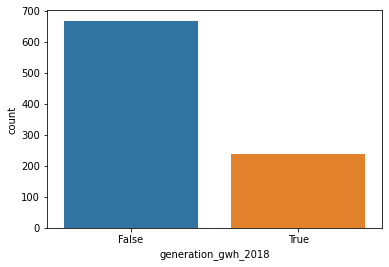

In [73]:
sns.countplot(data["generation_gwh_2018"]<1000)
(data["generation_gwh_2018"]<1000).value_counts()

### checking the distribution of data 

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

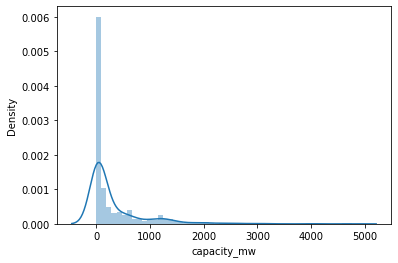

In [74]:
sns.distplot(data["capacity_mw"])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

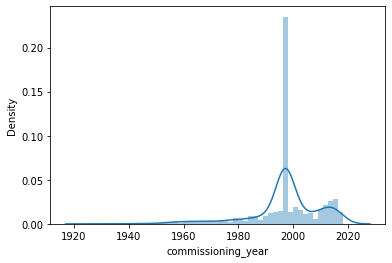

In [75]:
sns.distplot(data["commissioning_year"])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

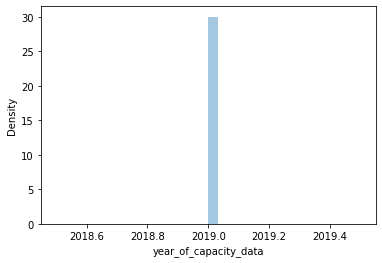

In [76]:
sns.distplot(data["year_of_capacity_data"])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

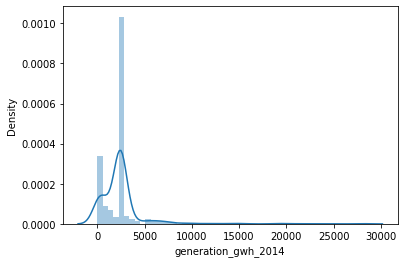

In [77]:
sns.distplot(data["generation_gwh_2014"])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

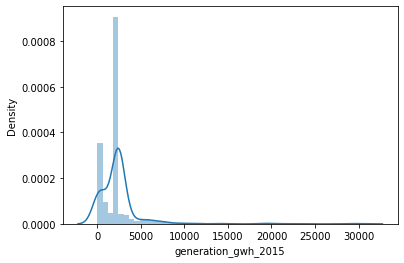

In [78]:
sns.distplot(data["generation_gwh_2015"])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

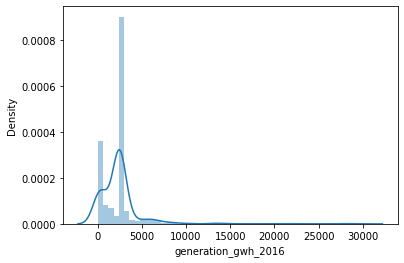

In [79]:
sns.distplot(data["generation_gwh_2016"])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

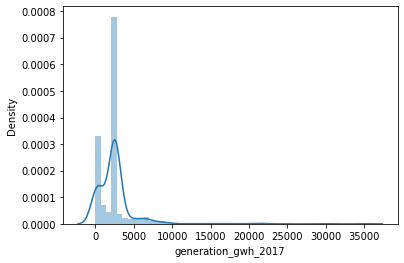

In [80]:
sns.distplot(data["generation_gwh_2017"])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

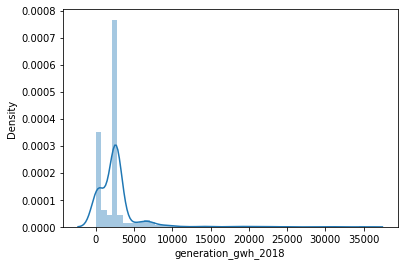

In [81]:
sns.distplot(data["generation_gwh_2018"])

### outliers visualizaton

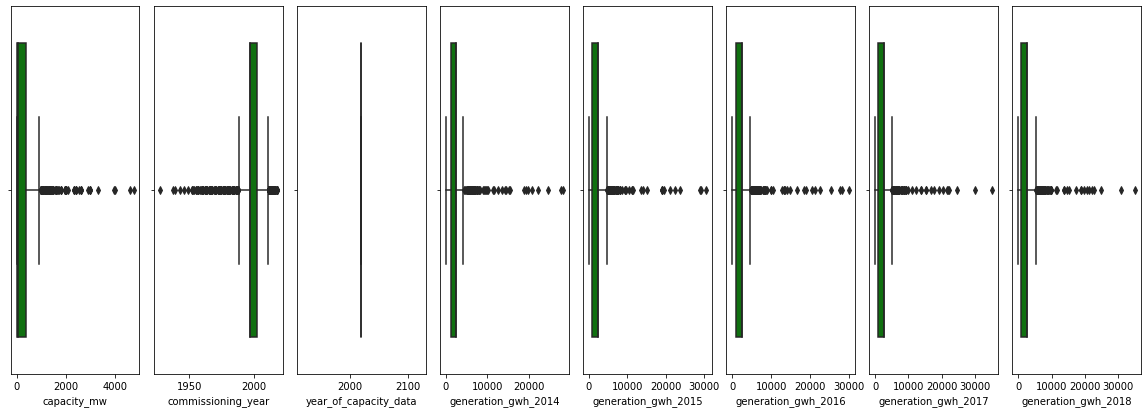

In [82]:
column = data_num.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data_num[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

# as we can see there are lot   of outliers in the data 

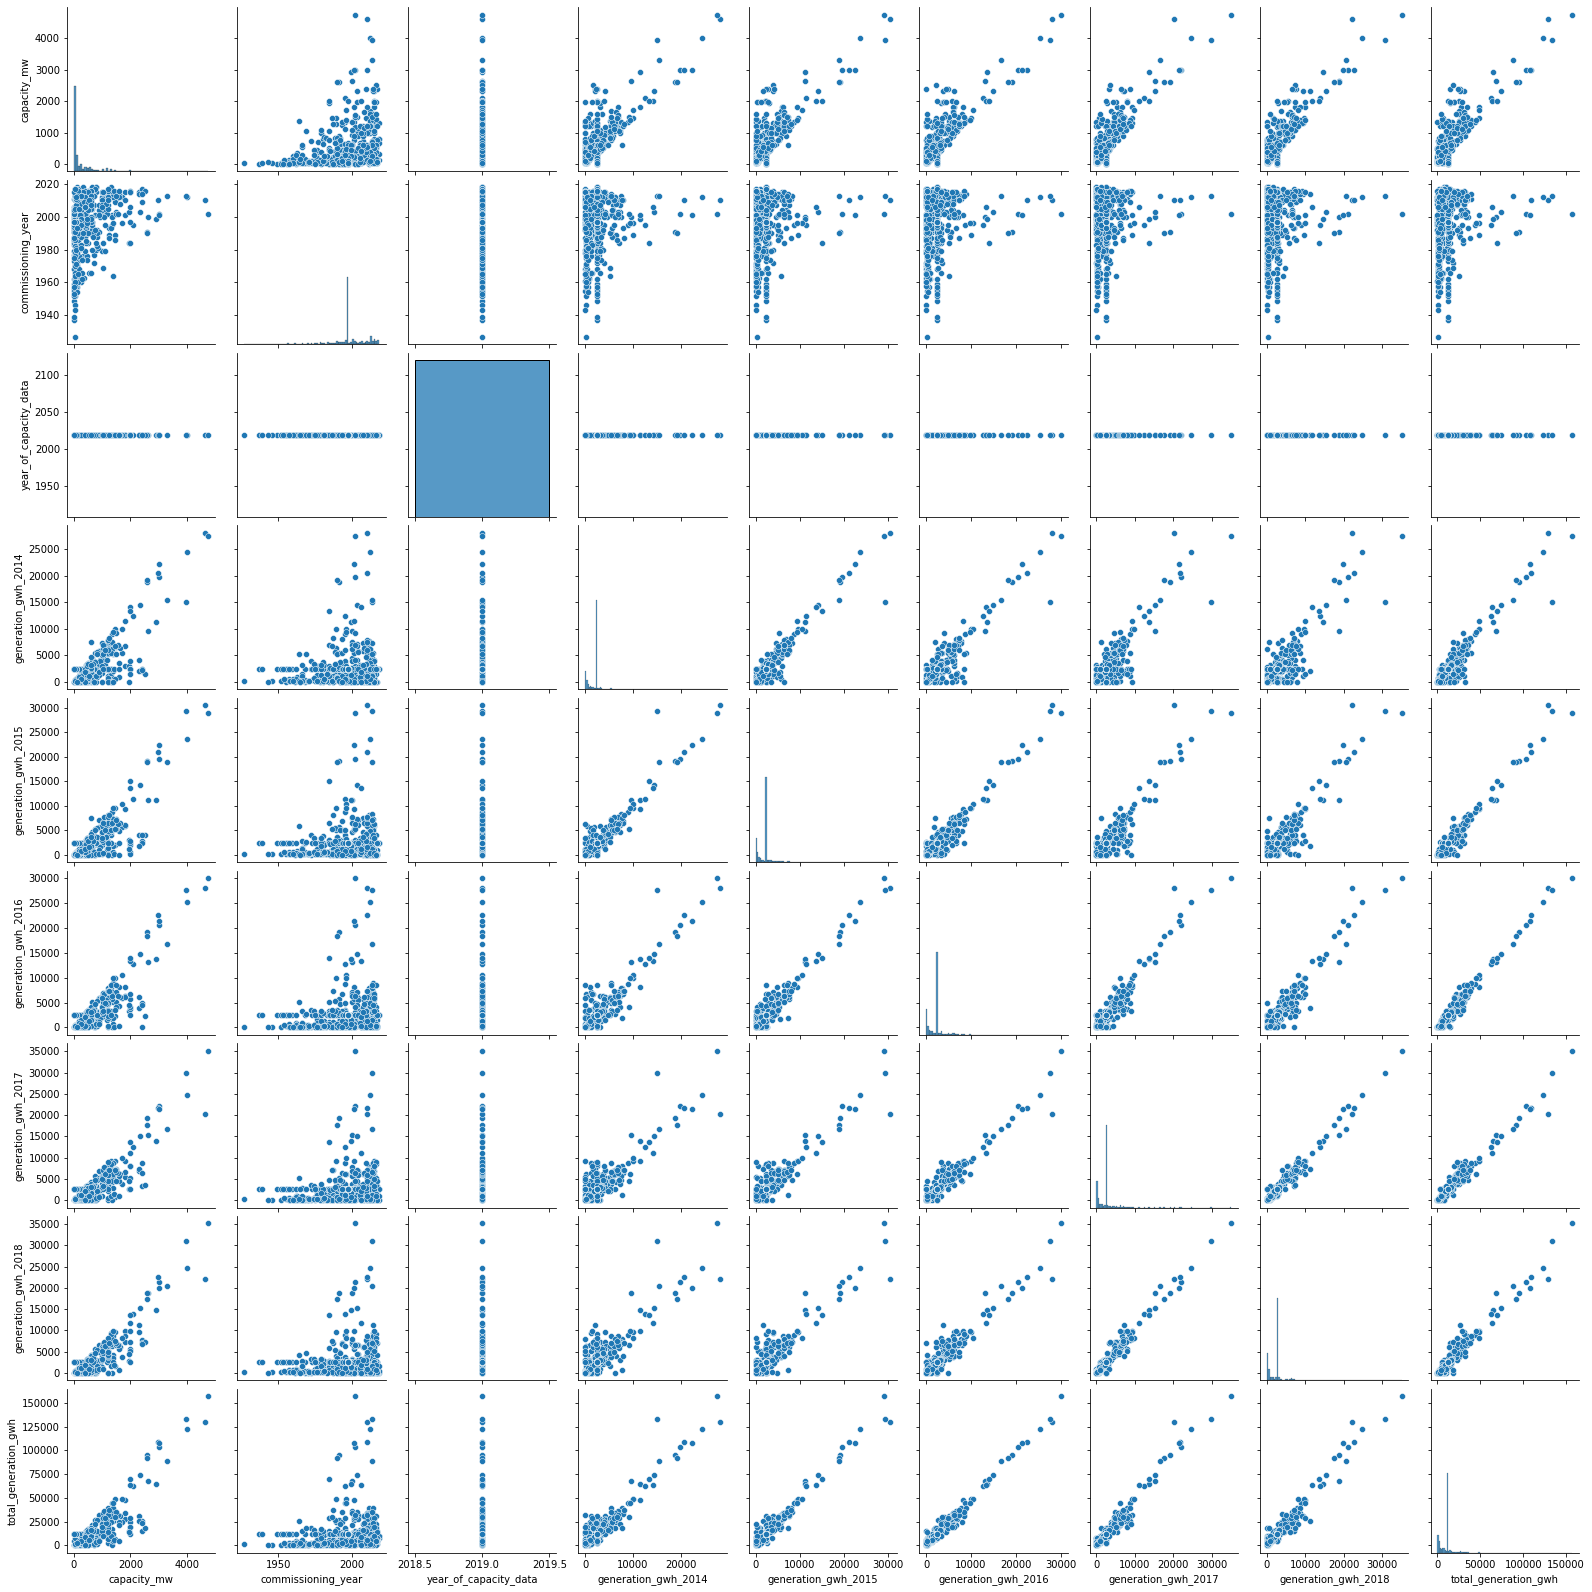

In [83]:
sns.pairplot(data)

# bivariate analysis 

493    Coal
494    Coal
695    Coal
808    Coal
880    Coal
Name: primary_fuel, dtype: object

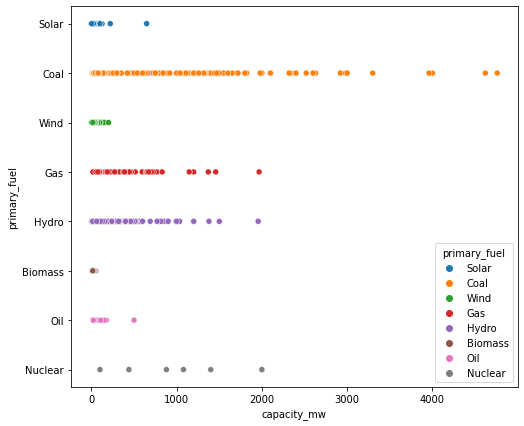

In [84]:
plt.figure(figsize = (8,7))
sns.scatterplot( x = "capacity_mw", y =  "primary_fuel", data = data , hue = "primary_fuel")
data.query('capacity_mw >  3000 ')['primary_fuel']

## from the above garph we can see the   coal has the highest capacity_mw  >4000

<AxesSubplot:xlabel='capacity_mw', ylabel='other_fuel1'>

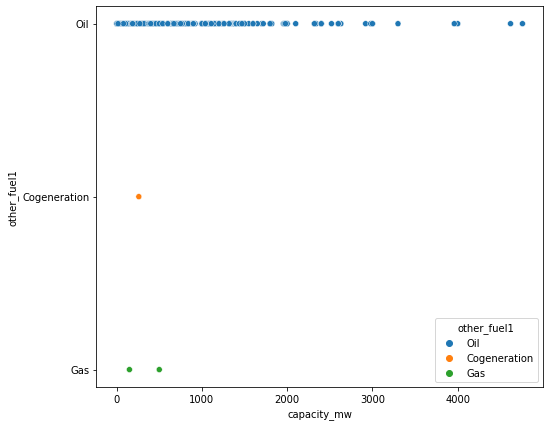

In [85]:
plt.figure(figsize = (8,7))
sns.scatterplot( x = "capacity_mw", y =  "other_fuel1", data = data , hue = "other_fuel1")

### as we can see from the above graph coal is the most preferred fuel for power generation 


 ## total_generation_gwh  and capacity_mw have a  low positive correlation

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

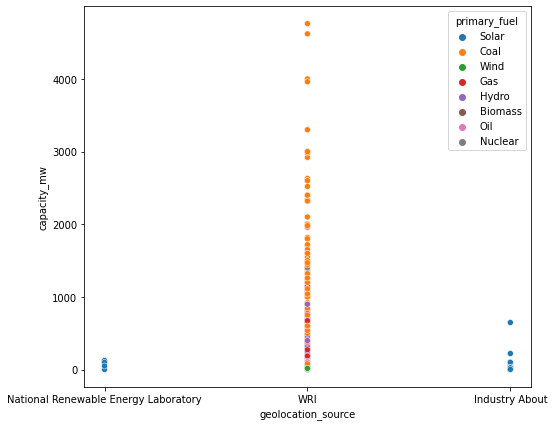

In [86]:
plt.figure(figsize = (8,7))
sns.scatterplot( x = "geolocation_source", y =  "capacity_mw", data = data , hue = "primary_fuel")


# as we can see from above graph more data is provided by  WRI

In [87]:
data_num

capacity_mw  commissioning_year  year_of_capacity_data  \
0          2.500         2011.000000                 2019.0   
1         98.000         1997.091082                 2019.0   
2         39.200         1997.091082                 2019.0   
3        135.000         2004.000000                 2019.0   
4       1800.000         2015.000000                 2019.0   
5        250.000         2005.000000                 2019.0   
6         60.000         1970.000000                 2019.0   
7        192.000         2010.000000                 2019.0   
8        290.000         2004.000000                 2019.0   
9        210.000         2008.000000                 2019.0   
10      1350.000         2014.000000                 2019.0   
11       134.000         1985.000000                 2019.0   
12      1200.000         2011.000000                 2019.0   
13        16.950         1986.000000                 2019.0   
14         9.000         1987.000000                 2019.0   
15      2630.000         2000.000000                 2019.0   
16       419.330         1989.000000                 2019.0   
17       600.000         1997.091082                 2019.0   
18      1200.000         2015.000000                 2019.0   
19        10.000         1997.091082                 2019.0   
20        17.000         1997.091082                 2019.0   
21        24.000         1997.091082                 2019.0   
22       652.000         1989.000000                 2019.0   
23       600.000         2017.000000                 2019.0   
24        46.000         1997.091082                 2019.0   
25        50.000         2015.000000                 2019.0   
26         1.000         1997.091082                 2019.0   
27        16.500         1997.091082                 2019.0   
28        50.000         1997.091082                 2019.0   
29       113.600         1997.091082                 2019.0   
30        19.800         1997.091082                 2019.0   
31        13.200         1997.091082                 2019.0   
32         5.000         1997.091082                 2019.0   
33         5.000         1997.091082                 2019.0   
34         5.000         1997.091082                 2019.0   
35         5.000         1997.091082                 2019.0   
36         5.000         1997.091082                 2019.0   
37         5.000         1997.091082                 2019.0   
38         5.000         1997.091082                 2019.0   
39       705.000         1977.000000                 2019.0   
40        28.000         1997.091082                 2019.0   
41       450.000         2008.000000                 2019.0   
42       450.000         2015.000000                 2019.0   
43       180.000         1980.000000                 2019.0   
44      1050.000         2003.000000                 2019.0   
45       600.000         2015.000000                 2019.0   
46       510.000         1984.000000                 2019.0   
47        67.500         1997.091082                 2019.0   
48        10.000         1997.091082                 2019.0   
49       300.000         2015.000000                 2019.0   
50       335.000         1976.000000                 2019.0   
51        12.000         1996.000000                 2019.0   
52       315.000         1991.000000                 2019.0   
53        30.000         2002.000000                 2019.0   
54        60.000         2001.000000                 2019.0   
55        20.000         2006.000000                 2019.0   
56        20.000         1997.091082                 2019.0   
57      1200.000         2014.000000                 2019.0   
58        42.000         2006.000000                 2019.0   
59       720.000         2007.000000                 2019.0   
60        90.000         1988.000000                 2019.0   
61      1320.000         2014.000000                 2019.0   
62        90.000         2011.000000

In [88]:
data_cat.columns

Index(['country', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'owner', 'source', 'geolocation_source',
       'generation_data_source'],
      dtype='object')

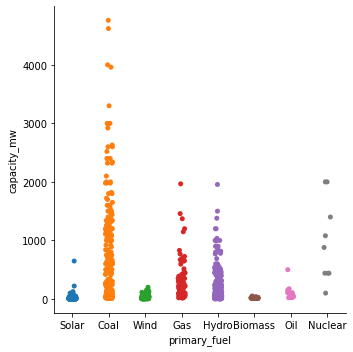

In [89]:
sns.catplot(x = "primary_fuel",y = "capacity_mw",data = data)

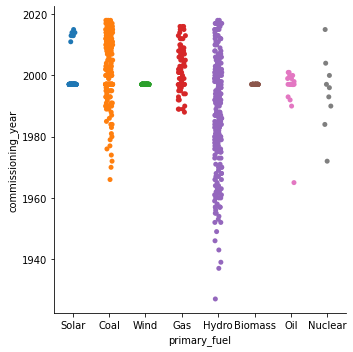

In [90]:
sns.catplot(x = "primary_fuel",y = "commissioning_year",data = data)

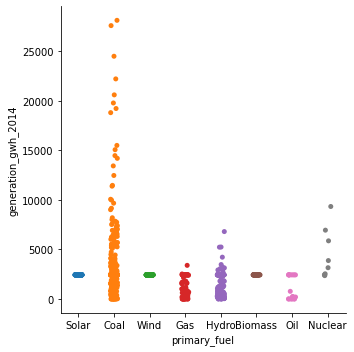

In [91]:
sns.catplot(x = "primary_fuel",y = "generation_gwh_2014",data = data)

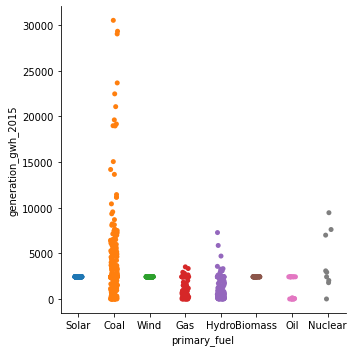

In [92]:
sns.catplot(x = "primary_fuel",y = "generation_gwh_2015",data = data)

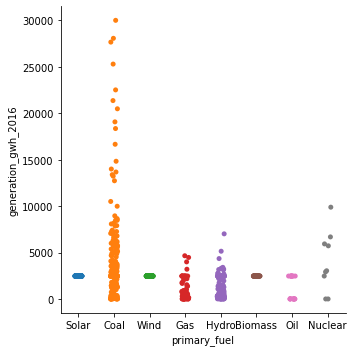

In [93]:
sns.catplot(x = "primary_fuel",y = "generation_gwh_2016",data = data)

In [94]:
group = d.groupby(["owner", "total_generation_gwh" ,"capacity_mw","primary_fuel"]).size(). reset_index()
group = group.drop([0],axis = 1)
group = group.sort_values(by = ["total_generation_gwh"], axis=0, ascending=False, inplace=False, kind='quicksort')
group =group.reset_index().drop(["index"],axis = 1)
d = group.sample(500)

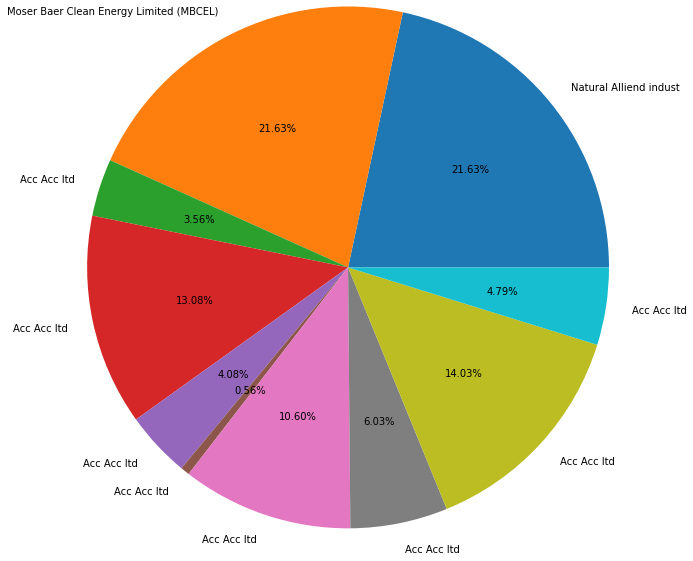

In [95]:
fuel = d["primary_fuel"].values
power = d["total_generation_gwh"].values
own = d["owner"].values
plt.pie(power[0:10],labels = own[0:10], autopct = "%1.2f%%" , radius = 3)
plt.show()

# as per above chart ACC ACC LTD  ownes majority of  the power plants 

In [96]:
a = data["owner"] == "Acc Acc ltd"

In [97]:
a.value_counts()

True     569
False    338
Name: owner, dtype: int64

 
 
 #  ACC  ACC owns 569 companies 

# encoding the categorical data

In [98]:
from sklearn .preprocessing import OrdinalEncoder

In [99]:
enc =  OrdinalEncoder()

In [100]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [101]:
data

country   name  gppd_idnr  capacity_mw  primary_fuel  other_fuel1  \
0        0.0    0.0      657.0        2.500           6.0          2.0   
1        0.0    1.0      519.0       98.000           1.0          2.0   
2        0.0    2.0      853.0       39.200           7.0          2.0   
3        0.0    3.0        0.0      135.000           2.0          2.0   
4        0.0    4.0        1.0     1800.000           1.0          2.0   
5        0.0    5.0        2.0      250.000           1.0          2.0   
6        0.0    6.0        3.0       60.000           3.0          2.0   
7        0.0    7.0        4.0      192.000           3.0          2.0   
8        0.0    8.0        5.0      290.000           3.0          2.0   
9        0.0    9.0        6.0      210.000           1.0          2.0   
10       0.0   10.0        7.0     1350.000           1.0          2.0   
11       0.0   11.0        8.0      134.000           3.0          2.0   
12       0.0   12.0        9.0     1200.000           1.0          2.0   
13       0.0   13.0       10.0       16.950           3.0          2.0   
14       0.0   14.0       11.0        9.000           3.0          2.0   
15       0.0   15.0       12.0     2630.000           1.0          2.0   
16       0.0   16.0       13.0      419.330           2.0          2.0   
17       0.0   17.0      634.0      600.000           1.0          2.0   
18       0.0   18.0       14.0     1200.000           1.0          2.0   
19       0.0   19.0      576.0       10.000           0.0          2.0   
20       0.0   20.0      577.0       17.000           0.0          2.0   
21       0.0   21.0      542.0       24.000           0.0          2.0   
22       0.0   22.0       15.0      652.000           2.0          2.0   
23       0.0   23.0       16.0      600.000           1.0          2.0   
24       0.0   24.0      578.0       46.000           1.0          2.0   
25       0.0   25.0      656.0       50.000           6.0          2.0   
26       0.0   26.0      704.0        1.000           6.0          2.0   
27       0.0   27.0      669.0       16.500           7.0          2.0   
28       0.0   28.0      705.0       50.000           6.0          2.0   
29       0.0   29.0      883.0      113.600           7.0          2.0   
30       0.0   30.0      831.0       19.800           7.0          2.0   
31       0.0   31.0      668.0       13.200           7.0          2.0   
32       0.0   32.0      706.0        5.000           6.0          2.0   
33       0.0   33.0      707.0        5.000           6.0          2.0   
34       0.0   34.0      708.0        5.000           6.0          2.0   
35       0.0   35.0      709.0        5.000           6.0          2.0   
36       0.0   36.0      710.0        5.000           6.0          2.0   
37       0.0   37.0      711.0        5.000           6.0          2.0   
38       0.0   38.0      712.0        5.000           6.0          2.0   
39       0.0   39.0       17.0      705.000           1.0          2.0   
40       0.0   40.0      543.0       28.000           0.0          2.0   
41       0.0   41.0       18.0      450.000           3.0          2.0   
42       0.0   42.0       19.0      450.000           3.0          2.0   
43       0.0   43.0       20.0      180.000           3.0          2.0   
44       0.0   44.0       21.0     1050.000           1.0          2.0   
45       0.0   45.0       23.0      600.000           1.0          2.0   
46       0.0   46.0       22.0      510.000           3.0          2.0   
47       0.0   47.0      579.0       67.500           1.0          2.0   
48       0.0   48.0      520.0       10.000           1.0          2.0   
49       0.0   49.0       24.0      300.000           1.0          2.0   
50       0.0   50.0       25.0      335.000           1.0          2.0   
51       0.0   51.0       26.0       12.000           3.0          2.0   
52       0.0   52.0       27.0      315.000           3.0          2.0   
53       

  
  ### categorical data is now encoded and made as numerical data

# checking and clearing skewness

In [102]:
data.skew()

country                    0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
primary_fuel               0.472251
other_fuel1              -20.453120
other_fuel2              -20.453120
other_fuel3              -20.453120
commissioning_year        -1.399359
owner                      1.364406
source                     1.827373
geolocation_source        -2.159841
year_of_capacity_data      0.000000
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
total_generation_gwh       5.219383
dtype: float64

In [103]:
from sklearn.preprocessing import  power_transform
data["capacity_mw"] =  power_transform(data["capacity_mw"].array.reshape(-1, 1),method = 'yeo-johnson')

In [104]:
data["commissioning_year"] =  power_transform(data["commissioning_year"].array.reshape(-1, 1),method = 'yeo-johnson')

In [105]:
data["generation_gwh_2014"] =  power_transform(data["generation_gwh_2014"].array.reshape(-1, 1),method = 'yeo-johnson')

In [106]:
data["generation_gwh_2015"] =  power_transform(data["generation_gwh_2015"].array.reshape(-1, 1),method = 'yeo-johnson')

In [107]:
data["generation_gwh_2016"] =  power_transform(data["generation_gwh_2016"].array.reshape(-1, 1),method = 'yeo-johnson')

In [108]:
data["generation_gwh_2017"] =  power_transform(data["generation_gwh_2017"].array.reshape(-1, 1),method = 'yeo-johnson')

In [109]:
data["generation_gwh_2018"] =  power_transform(data["generation_gwh_2018"].array.reshape(-1, 1),method = 'yeo-johnson')

In [110]:
data["total_generation_gwh"] =  power_transform(data["total_generation_gwh"].array.reshape(-1, 1),method = 'yeo-johnson')

In [111]:
data.skew()

country                    0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                0.022164
primary_fuel               0.472251
other_fuel1              -20.453120
other_fuel2              -20.453120
other_fuel3              -20.453120
commissioning_year        -0.080999
owner                      1.364406
source                     1.827373
geolocation_source        -2.159841
year_of_capacity_data      0.000000
generation_gwh_2014        0.123226
generation_gwh_2015        0.074582
generation_gwh_2016        0.041821
generation_gwh_2017        0.018337
generation_gwh_2018        0.000783
generation_data_source     0.000000
total_generation_gwh       0.149755
dtype: float64

# checking  for outliers and  clearing them 

In [112]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data_num))
data_num.shape

(907, 8)

In [113]:
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 222, 308, 308, 308, 308, 308, 308,
       342, 363, 364, 364, 364, 364, 364, 364, 371, 375, 444, 454, 478,
       482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 538, 541, 573, 583, 592, 601, 621, 648, 648, 648, 648, 648,
       648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695, 695,
       706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726,
       726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786, 788,
       807, 808, 808, 808, 808, 808, 808, 848, 880, 880, 880, 880, 880,
       880], dtype=int64), array([0, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 0, 3, 4, 5, 6, 7, 1, 0, 3,
       4, 5, 6, 7, 1, 0, 0, 3, 4, 5, 6, 7, 1, 0, 1, 1, 1, 0, 1, 0, 3, 4,
       5, 6, 7, 0, 3, 4, 5, 6, 7, 1, 1, 1, 1, 1, 1, 1, 0, 3, 4, 5, 6, 7,
       0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 1, 1, 3, 4, 5, 7, 3, 4, 5, 6,
       7, 0, 3, 4, 5, 6, 7, 1, 0

In [114]:
len(np.where(z>3)[0])

118

In [115]:
df = data_num[(z<3).all(axis=1)]

In [116]:
df

Empty DataFrame
Columns: [capacity_mw, commissioning_year, year_of_capacity_data, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []

# checking   correlation 

In [117]:
cor = data.corr()

In [118]:
cor


country      name  gppd_idnr  capacity_mw  \
country                     NaN       NaN        NaN          NaN   
name                        NaN  1.000000   0.332205     0.013507   
gppd_idnr                   NaN  0.332205   1.000000    -0.565769   
capacity_mw                 NaN  0.013507  -0.565769     1.000000   
primary_fuel                NaN  0.040753   0.609180    -0.536268   
other_fuel1                 NaN -0.074663   0.002333    -0.038544   
other_fuel2                 NaN -0.074663   0.002333    -0.038544   
other_fuel3                 NaN -0.074663   0.002333    -0.038544   
commissioning_year          NaN -0.039104  -0.048157     0.335313   
owner                       NaN  0.098075   0.630589    -0.491254   
source                      NaN -0.014640   0.416384    -0.393997   
geolocation_source          NaN  0.036225  -0.464174     0.470250   
year_of_capacity_data       NaN       NaN        NaN          NaN   
generation_gwh_2014         NaN  0.066511   0.265443     0.084061   
generation_gwh_2015         NaN  0.047700   0.275082     0.066111   
generation_gwh_2016         NaN  0.043517   0.255922     0.082124   
generation_gwh_2017         NaN  0.058141   0.242235     0.087789   
generation_gwh_2018         NaN  0.042513   0.241891     0.080710   
generation_data_source      NaN       NaN        NaN          NaN   
total_generation_gwh        NaN  0.065088   0.260865     0.119486   

                        primary_fuel  other_fuel1  other_fuel2  other_fuel3  \
country                          NaN          NaN          NaN          NaN   
name                        0.040753    -0.074663    -0.074663    -0.074663   
gppd_idnr                   0.609180     0.002333     0.002333     0.002333   
capacity_mw                -0.536268    -0.038544    -0.038544    -0.038544   
primary_fuel                1.000000     0.004912     0.004912     0.004912   
other_fuel1                 0.004912     1.000000     1.000000     1.000000   
other_fuel2                 0.004912     1.000000     1.000000     1.000000   
other_fuel3                 0.004912     1.000000     1.000000     1.000000   
commissioning_year         -0.192810     0.037565     0.037565     0.037565   
owner                       0.284296     0.033687     0.033687     0.033687   
source                      0.053613     0.026590     0.026590     0.026590   
geolocation_source         -0.483217    -0.021408    -0.021408    -0.021408   
year_of_capacity_data            NaN          NaN          NaN          NaN   
generation_gwh_2014        -0.002429     0.038842     0.038842     0.038842   
generation_gwh_2015         0.004981     0.054922     0.054922     0.054922   
generation_gwh_2016        -0.005088     0.064157     0.064157     0.064157   
generation_gwh_2017         0.002259     0.030116     0.030116     0.030116   
generation_gwh_2018        -0.000451     0.069349     0.069349     0.069349   
generation_data_source           NaN          NaN          NaN          NaN   
total_generation_gwh       -0.019246     0.038819     0.038819     0.038819   

                        commissioning_year     owner    source  \
country                                NaN       NaN       NaN   
name                             -0.039104  0.098075 -0.014640   
gppd_idnr                        -0.048157  0.630589  0.416384   
capacity_mw                       0.335313 -0.491254 -0.393997   
primary_fuel                     -0.192810  0.284296  0.053613   
other_fuel1                       0.037565  0.033687  0.026590   
other_fuel2                       0.037565  0.033687  0.026590   
other_fuel3                       0.037565  0.033687  0.026590   
commissioning_year                1.000000 -0.072925 -0.044480   
owner                            -0.072925  1.000000  0.769583   
source                           -0.044480  0.769583  1.000000   
geolocation_source                0.048715 -0.384838 -0.505720   
year_of_capacity_data                  NaN       NaN    

<AxesSubplot:>

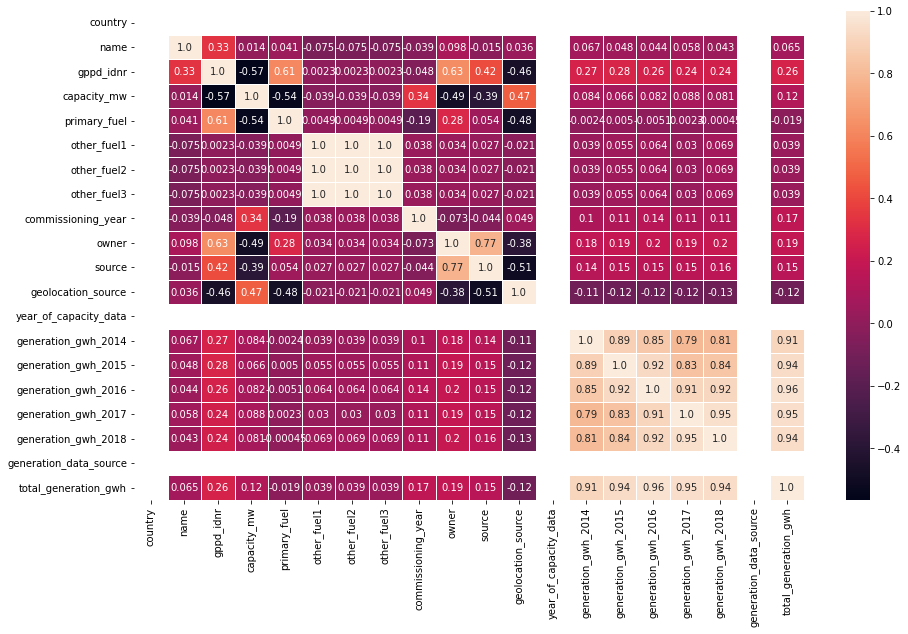

In [119]:
plt.figure(figsize =  (15,9))
sns.heatmap(cor,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

#### dropping  columns with no correlction 

In [120]:
data.drop ( [ "year_of_capacity_data" , "generation_data_source"]  , axis = 1 , inplace = True)

In [121]:
data.drop ( [  "total_generation_gwh" ,"generation_gwh_2018"]  , axis = 1 , inplace = True)

In [122]:
data.drop ( [ "country"]  , axis = 1 , inplace = True)

In [123]:
data.drop ( [ "generation_gwh_2017"]  , axis = 1 , inplace = True)

In [124]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if (data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

other_fuel2
other_fuel3
other_fuel3
source
generation_gwh_2015
generation_gwh_2016
generation_gwh_2016


# checking Variance 

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [126]:
def calc_vif(x):
    vif= pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

In [127]:
calc_vif(data)

variables        VIF
0                  name   5.347882
1             gppd_idnr  15.182515
2           capacity_mw   2.277971
3          primary_fuel   7.769738
4           other_fuel1        inf
5           other_fuel2        inf
6           other_fuel3        inf
7    commissioning_year   1.239578
8                 owner   5.481340
9                source   7.297795
10   geolocation_source  15.248858
11  generation_gwh_2014   4.922334
12  generation_gwh_2015   8.892915
13  generation_gwh_2016   7.134931

 #  seperating x and y 

In [128]:
 x = data.drop(["primary_fuel"] , axis = 1)

In [129]:
y =data["primary_fuel"]

In [130]:
x.shape

(907, 13)

In [131]:
y.shape

(907,)


#### as we can see their is  imbalance in  Y

#    over sampling  to balance data

In [132]:
from imblearn.over_sampling import RandomOverSampler

In [133]:
y.value_counts()

1.0    258
3.0    251
6.0    127
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [134]:
smt =  RandomOverSampler()


In [135]:
x_train,y_train  = smt.fit_resample(x,y)

In [136]:
y_train.value_counts()


6.0    258
1.0    258
7.0    258
2.0    258
3.0    258
0.0    258
5.0    258
4.0    258
Name: primary_fuel, dtype: int64

## y  has  now equal number of data

# scaling data 

In [137]:
from sklearn.preprocessing  import MinMaxScaler

In [138]:
sc = MinMaxScaler()

In [139]:

x = sc. fit_transform(x_train)

In [140]:
x

array([[0.        , 0.72516556, 0.16901741, ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.00110375, 0.57284768, 0.58239892, ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.00220751, 0.9415011 , 0.47606373, ..., 0.37735459, 0.37960423,
        0.38607969],
       ...,
       [0.23509934, 0.94370861, 0.47546506, ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.45364238, 0.75717439, 0.45589478, ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.43267108, 0.91059603, 0.55250363, ..., 0.37735459, 0.37960423,
        0.38607969]])

#  PCA 

In [141]:
from sklearn.decomposition import PCA

In [142]:
pca = PCA (n_components = 13)

In [143]:
x_train =  pca.fit_transform(x)

In [144]:

x = x_train 

In [145]:

x_train = pd.DataFrame(x_train)

In [146]:
def calc_vif(x):
    vif= pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

In [147]:
calc_vif(x_train)

variables  VIF
0           0  1.0
1           1  1.0
2           2  1.0
3           3  1.0
4           4  1.0
5           5  1.0
6           6  1.0
7           7  1.0
8           8  1.0
9           9  1.0
10         10  1.0
11         11  1.0
12         12  1.0

In [148]:
y =y_train
y.value_counts()

6.0    258
1.0    258
7.0    258
2.0    258
3.0    258
0.0    258
5.0    258
4.0    258
Name: primary_fuel, dtype: int64

# testing training and  splitting the data for machine learning

In [149]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [150]:
from sklearn.model_selection import  train_test_split
ln =  LogisticRegression()

In [151]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  70.56329497274379
 testing  score is  0 is 69.97578692493947 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  71.53240460327075
 testing  score is  1 is 69.73365617433413 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  72.98606904906117
 testing  score is  2 is 69.73365617433413 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  72.3198061780739
 testing  score is  3 is 72.39709443099274 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  71.04784978800727
 testing  score is  4 is 71.91283292978208 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  71.41126589945488
 testing  score is  5 is 69.49152542372882 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  71.83525136281041
 testing  score i

training score at 57 is  72.38037552998183
 testing  score is  57 is 72.15496368038741 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  72.56208358570562
 testing  score is  58 is 69.49152542372882 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  72.8649303452453
 testing  score is  59 is 72.15496368038741 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  72.56208358570562
 testing  score is  60 is 70.70217917675545 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  72.3198061780739
 testing  score is  61 is 72.88135593220339 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  72.44094488188976
 testing  score is  62 is 71.1864406779661 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  71.59297395517868
 testing  score is  63 is 69.73365617433413 

at rando

In [152]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state =  87, test_size = .20)
ln.fit(x_train,y_train)
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))

training score is  0.7195639006662629
 testing  score is 0.7263922518159807


In [153]:
import colored
from termcolor import colored


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier 
    
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
def run_exps(x_train: pd.DataFrame , y_train: pd.DataFrame, x_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    dfs = []
models = [
          ('LogisticRegression', LogisticRegression()), 
          ('RandomForestClassifier', RandomForestClassifier()),
          ('KNeighborsClassifier', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('GaussianNB', GaussianNB()),
          ("ExtraTreesClassifier" , ExtraTreesClassifier())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=False)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name  )
        print(classification_report(y_test, y_pred,labels=[0,1,2,3,4,5,6,7]))
        print(confusion_matrix (y_test, y_pred),"\n")
        print(accuracy_score(y_test,y_pred),"\n")


LogisticRegression
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        57
           1       0.50      0.31      0.38        42
           2       0.59      0.36      0.45        53
           3       0.66      0.61      0.63        51
           4       0.70      0.98      0.82        51
           5       0.82      0.57      0.68        47
           6       1.00      1.00      1.00        61
           7       0.73      1.00      0.84        51

    accuracy                           0.73       413
   macro avg       0.71      0.71      0.69       413
weighted avg       0.72      0.73      0.71       413

[[48  0  0  0  0  0  0  9]
 [ 7 13  7  1  8  1  0  5]
 [ 3  8 19 11  6  2  0  4]
 [ 0  4  6 31  7  3  0  0]
 [ 0  1  0  0 50  0  0  0]
 [15  0  0  4  0 27  0  1]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 51]] 

0.7263922518159807 

RandomForestClassifier
              precision    recall  f1-score   support

           0

# accuracy and cross validation for extra tree 

In [156]:
xt = ExtraTreesClassifier()

x_train,x_test,y_train,y_test = train_test_split( x , y , random_state =  87, test_size = .20)
xt.fit(x_train,y_train)
pred_train = xt.predict(x_train)
pred_test = xt.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
acc = accuracy_score(y_test, pred_test)

training score is  1.0
 testing  score is 0.9491525423728814


In [158]:
from sklearn.model_selection import cross_val_score

xt = ExtraTreesClassifier()
pred_test_extra = accuracy_score(y_test, pred_test)
for j in range(2,15):
    ls_score = cross_val_score(xt,x,y,cv = j)
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("accuracy is  = ", pred_test_extra *100)
    print("\n")

at cv : 2
cross validation score is : 82.17054263565892
accuracy is  =  94.91525423728814


at cv : 3
cross validation score is : 86.7248062015504
accuracy is  =  94.91525423728814


at cv : 4
cross validation score is : 89.24418604651163
accuracy is  =  94.91525423728814


at cv : 5
cross validation score is : 91.08523942734902
accuracy is  =  94.91525423728814


at cv : 6
cross validation score is : 91.95736434108527
accuracy is  =  94.91525423728814


at cv : 7
cross validation score is : 93.07077794798307
accuracy is  =  94.91525423728814


at cv : 8
cross validation score is : 92.9748062015504
accuracy is  =  94.91525423728814


at cv : 9
cross validation score is : 92.97660485623273
accuracy is  =  94.91525423728814


at cv : 10
cross validation score is : 93.79907133811734
accuracy is  =  94.91525423728814


at cv : 11
cross validation score is : 94.47579101976643
accuracy is  =  94.91525423728814


at cv : 12
cross validation score is : 94.3313953488372
accuracy is  =  94.91525

# for extra tree classifier at cv 14
# cross validation score is : 95.76585034263564
# accuracy is  =  94.67312348668281


# accuracy and cross validation of random forest`

In [159]:
rmf = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state =  87, test_size = .20)
rmf.fit(x_train,y_train)
pred_train = rmf.predict(x_train)
pred_test = rmf.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
acc = accuracy_score(y_test, pred_test)

training score is  1.0
 testing  score is 0.9467312348668281


In [160]:
ls =  accuracy_score(y_test, pred_test)

rmf = RandomForestClassifier()

for j in range(2,15):
    ls_score = cross_val_score(rmf,x,y,cv = j)
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("accuracy is  = ", acc *100)
    print("\n")

at cv : 2
cross validation score is : 80.62015503875969
accuracy is  =  94.67312348668281


at cv : 3
cross validation score is : 84.98062015503876
accuracy is  =  94.67312348668281


at cv : 4
cross validation score is : 88.90503875968992
accuracy is  =  94.67312348668281


at cv : 5
cross validation score is : 90.89129974846612
accuracy is  =  94.67312348668281


at cv : 6
cross validation score is : 90.98837209302326
accuracy is  =  94.67312348668281


at cv : 7
cross validation score is : 92.05432293982969
accuracy is  =  94.67312348668281


at cv : 8
cross validation score is : 92.10271317829456
accuracy is  =  94.67312348668281


at cv : 9
cross validation score is : 92.44330527603739
accuracy is  =  94.67312348668281


at cv : 10
cross validation score is : 92.97570470428218
accuracy is  =  94.67312348668281


at cv : 11
cross validation score is : 93.07036688422514
accuracy is  =  94.67312348668281


at cv : 12
cross validation score is : 93.21705426356588
accuracy is  =  94.67

## as we can see for random  forest at cv : 13
## cross validation score is : 93.76585034263564
## accuracy is  =  94.67312348668281


###  we can  say   ExtraTreesClassifier     has the best      precision    recall  f1-score   than random forest 

###  and the best   performing   
### algorithm


# hyper parameter tuning

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kn = KFold(n_splits=5)

In [165]:
ada = ExtraTreesClassifier() 
gird_parameter = {  'criterion' : ["gini", "entropy", "log_loss"] , "max_features" : ["log2" , "sqrt", "auto"] ,'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30] } 
cv = KFold(n_splits = 5, shuffle = False)


In [166]:
cv = KFold(n_splits = 5, shuffle = False)
clf = GridSearchCV(ada,gird_parameter , scoring = accuracy_score , n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}


In [164]:
ext = ExtraTreesClassifier(criterion = "entropy" , max_features = "log2" )
ext.fit(x_train,y_train)
pred_train = ext.predict(x_train)
pred_test = ext.predict(x_test)
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")
print(accuracy_score(y_test,pred_test),"\n")

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        57
         1.0       0.83      0.71      0.77        42
         2.0       0.95      1.00      0.97        53
         3.0       0.88      0.86      0.87        51
         4.0       1.00      1.00      1.00        51
         5.0       0.98      1.00      0.99        47
         6.0       1.00      1.00      1.00        61
         7.0       1.00      1.00      1.00        51

    accuracy                           0.95       413
   macro avg       0.95      0.95      0.95       413
weighted avg       0.95      0.95      0.95       413

[[57  0  0  0  0  0  0  0]
 [ 3 30  2  6  0  1  0  0]
 [ 0  0 53  0  0  0  0  0]
 [ 0  6  1 44  0  0  0  0]
 [ 0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 51]] 

0.9539951573849879 



## for classification the best model is  extra tree classifier  with hyper parameter tuning 

## accuracy score  is :     0.9491525423728814 

##  class  ,    precision ,    recall  ,    f1-score  

         0.0              0.93      1.00      0.97       
         1.0              0.82      0.76      0.79        
         2.0              0.93      0.94      0.93        
         3.0              0.90      0.84      0.87        
         4.0              1.00      1.00      1.00        
         5.0              0.98      1.00      0.99        
         6.0              1.00      1.00      1.00        
         7.0              1.00      1.00      1.00

In [167]:
from sklearn.metrics  import roc_curve,auc


In [168]:
y_precict_proba = clf.predict_proba(x_test)[:,1]

In [169]:
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba , pos_label=1)

In [170]:
roc_auc  =  auc(fpr,tpr)

In [171]:
roc_auc

0.9781799512257734

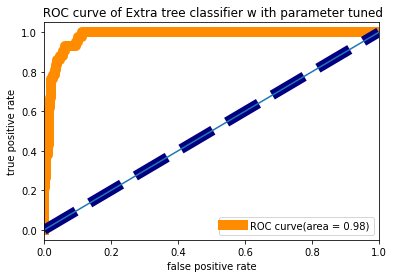

In [172]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title (" ROC curve of Extra tree classifier w ith parameter tuned")
plt.legend(loc="lower right")


plt.show()

In [175]:
import pickle
filename = "primary fuel.pkl"
pickle.dump(ext, open(filename,"wb"))


#### area under    ROC_AUC   curve is 0.99

#  CHECKING WITH  LINEAR REGRESSION to predict  capacity_mw            

In [ ]:
data


#

#  X and Y 

In [188]:
x = data.drop(["capacity_mw"] , axis = 1 )

In [189]:
y = data["capacity_mw"]

# scaling

In [178]:
from sklearn.preprocessing  import MinMaxScaler

In [179]:
m = MinMaxScaler()

In [180]:


x =  m.fit_transform(x)

In [181]:
x

array([[0.        , 0.72516556, 0.85714286, ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.00110375, 0.57284768, 0.14285714, ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.00220751, 0.9415011 , 1.        , ..., 0.37735459, 0.37960423,
        0.38607969],
       ...,
       [0.99779249, 0.98344371, 1.        , ..., 0.37735459, 0.37960423,
        0.38607969],
       [0.99889625, 0.59492274, 0.14285714, ..., 0.37735459, 0.37960423,
        0.38607969],
       [1.        , 0.96688742, 1.        , ..., 0.37735459, 0.37960423,
        0.38607969]])

# test train split

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics  import    mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [191]:
ln = LinearRegression()
ln

LinearRegression()

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = .10)

In [193]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  56.02027774650824
 testing  score is  0 is 57.42890461895392 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  58.08236627568212
 testing  score is  1 is 45.56939033438503 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  55.82517584512557
 testing  score is  2 is 58.00234423054047 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  57.918992751211306
 testing  score is  3 is 49.42199964800924 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  57.9596084535009
 testing  score is  4 is 47.81135757610863 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  54.7525219150627
 testing  score is  5 is 59.75666298363029 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  57.19232781479424
 testing  score i

 testing  score is  71 is 52.95625022996708 

at random state 72 model preforms best
at random_state =   72
training score at 72 is  56.539547406277045
 testing  score is  72 is 53.71328399163834 

at random state 73 model preforms best
at random_state =   73
training score at 73 is  55.08129524479186
 testing  score is  73 is 60.87617614464145 

at random state 74 model preforms best
at random_state =   74
training score at 74 is  55.88108400579755
 testing  score is  74 is 57.61179235072389 

at random state 75 model preforms best
at random_state =   75
training score at 75 is  57.463050721526464
 testing  score is  75 is 48.67603412030521 

at random state 76 model preforms best
at random_state =   76
training score at 76 is  57.09750614845661
 testing  score is  76 is 53.00445932590133 

at random state 77 model preforms best
at random_state =   77
training score at 77 is  58.126616512898174
 testing  score is  77 is 43.89163074013892 

at random state 78 model preforms best
at ran

# linear  regression  show poor performance , checking with   other algorithms 

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor 

 
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
def run_exps(x_train: pd.DataFrame , y_train: pd.DataFrame, x_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    dfs = []
models = [
          ('LinReg', LinearRegression()), 
          ('RF', RandomForestRegressor()),
          ('KNN', KNeighborsRegressor()),
          ('SVM', SVR()), 
          ('ETR', ExtraTreesRegressor()),
        ]
results = []
names = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=5 )
        cv_results = model_selection.cross_validate(model, x, y, cv=kfold, scoring=r2_score)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name)
        print(r2_score(y_test, y_pred))



LinReg
0.4961604246946487
RF
0.8121735447440175
KNN
0.6318593496751596
SVM
0.4984088301291968
ETR
0.8136341326177576


# checking score for random forest 

In [195]:
from sklearn.ensemble import RandomForestRegressor
rmf = RandomForestRegressor()
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = 0.25 )
    rmf.fit(x_train,y_train)
    pred_train = rmf.predict(x_train)
    pred_test = rmf.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  97.03765759094682
 testing  score is  0 is 86.52883287708738 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  97.19735182598019
 testing  score is  1 is 77.61057895239152 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  97.16435782902496
 testing  score is  2 is 81.01644675837137 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  97.07464218065579
 testing  score is  3 is 78.39311725435955 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  97.19999302377063
 testing  score is  4 is 79.7068998284273 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  97.08469116832957
 testing  score is  5 is 84.13101759195513 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  97.28246981433098
 testing  score i

at random state 55 model preforms best
at random_state =   55
training score at 55 is  96.89247091550699
 testing  score is  55 is 84.35125633279455 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  97.04453763228379
 testing  score is  56 is 76.20701616469057 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  97.52038391185064
 testing  score is  57 is 78.02170209613186 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  97.454687976665
 testing  score is  58 is 75.9937923533557 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  97.10877175072163
 testing  score is  59 is 82.59048585993148 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  97.24561575402106
 testing  score is  60 is 79.50860966191556 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  97.1854193

In [197]:

rmf = RandomForestRegressor()

x_train,x_test,y_train,y_test = train_test_split( x , y ,random_state = 0 , test_size = .25 )
rmf.fit(x_train,y_train)
pred_train = rmf.predict(x_train)
pred_test = rmf.predict(x_test)
random_accuracy = r2_score(y_test, pred_test)

random_accuracy

0.8622382390526206

# extra tree

In [198]:
ext = ExtraTreesRegressor()

In [199]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ext.fit(x_train,y_train)
    pred_train = ext.predict(x_train)
    pred_test = ext.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  100.0
 testing  score is  0 is 84.12248005162616 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  100.0
 testing  score is  1 is 77.09305583673641 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  100.0
 testing  score is  2 is 80.36675529576546 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  100.0
 testing  score is  3 is 81.77812255020734 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  100.0
 testing  score is  4 is 79.4093186963802 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  100.0
 testing  score is  5 is 82.78838044551223 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  100.0
 testing  score is  6 is 77.23374479748541 

at random state 7 model preforms best
at random_state = 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  100.0
 testing  score is  60 is 84.52519241502469 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  100.0
 testing  score is  61 is 84.94149783586789 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  100.0
 testing  score is  62 is 81.23885153514081 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  100.0
 testing  score is  63 is 81.75477046964592 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  100.0
 testing  score is  64 is 84.31204971656585 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  100.0
 testing  score is  65 is 77.45882300134791 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  100.0
 testing  score is  66 is 81.04004330761194 

at random state 67 model pr

In [200]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 98 , test_size = .20)
ext.fit(x_train,y_train)
pred_train = ext.predict(x_train)
pred_test = ext.predict(x_test)
accuracy = r2_score(y_test, pred_test)
accuracy

0.8594466470606195

## ExtraTree  gives  score of 0.8689350450005069

# cross validation  for extra tree

In [201]:

from sklearn.model_selection import GridSearchCV
accuracy = r2_score(y_test, pred_test)


In [202]:
for j in range(2,10):
    ls_score = (cross_val_score(ext,x,y,cv = j))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = ", accuracy *100)
    print("\n")

at cv : 2
cross validation score is : 73.73398520257719
r 2 score =  85.94466470606194


at cv : 3
cross validation score is : 73.21256548605822
r 2 score =  85.94466470606194


at cv : 4
cross validation score is : 77.87534440046286
r 2 score =  85.94466470606194


at cv : 5
cross validation score is : 74.88911793442756
r 2 score =  85.94466470606194


at cv : 6
cross validation score is : 75.97106416059061
r 2 score =  85.94466470606194


at cv : 7
cross validation score is : 75.8670812457499
r 2 score =  85.94466470606194


at cv : 8
cross validation score is : 76.78554493431704
r 2 score =  85.94466470606194


at cv : 9
cross validation score is : 76.88669234230599
r 2 score =  85.94466470606194




# cross validation for random forest

In [203]:
for j in range(2,10):
    ls_score = (cross_val_score(rmf,x,y,cv = j))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = ", random_accuracy *100)
    print("\n")

at cv : 2
cross validation score is : 74.34419699616727
r 2 score =  86.22382390526207


at cv : 3
cross validation score is : 74.88042455322015
r 2 score =  86.22382390526207


at cv : 4
cross validation score is : 78.10425974493802
r 2 score =  86.22382390526207


at cv : 5
cross validation score is : 77.11520246541193
r 2 score =  86.22382390526207


at cv : 6
cross validation score is : 76.31408626291896
r 2 score =  86.22382390526207


at cv : 7
cross validation score is : 76.94031233411572
r 2 score =  86.22382390526207


at cv : 8
cross validation score is : 75.33086339036261
r 2 score =  86.22382390526207


at cv : 9
cross validation score is : 76.7726862198742
r 2 score =  86.22382390526207




##  in cross validation random forest gives a  CV score of  77.52759826768128  at  cv : 4 and r2 score of  85.8283406409701


# hyper parameter tuning for random forest 

In [204]:
rmf = RandomForestRegressor()
param_grid = {'criterion' : ["squared_error", "absolute_error", "poisson","mae", "mse"],"max_features" : ["sqrt", "log2", "auto"]}

In [205]:
clf = GridSearchCV(rmf,param_grid)

In [206]:
clf.fit(x_train , y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'mae', 'mse'],
                         'max_features': ['sqrt', 'log2', 'auto']})

In [207]:
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [208]:
 rmf = RandomForestRegressor(criterion = 'squared_error' ,max_features =  'log2' ,random_state = 98)


In [209]:
rmf.fit(x_train , y_train)
rmf.score(x_train , y_train)
y_pred = rmf.predict(x_test)
score = r2_score(y_test, y_pred)
print( "r2 score is ",score)
kn  = model_selection.KFold(n_splits=5 )
cross_val = cross_val_score(rmf,x,y, cv=kn)
rmf_cv = cross_val.mean()
print("cv " , rmf_cv)

r2 score is  0.8719627659318163
cv  0.7792484231081834


# hyper parameter tuning for extra tree

In [210]:
ext = ExtraTreesRegressor()
clf = GridSearchCV(ext,param_grid)
clf.fit(x_train , y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'mae', 'mse'],
                         'max_features': ['sqrt', 'log2', 'auto']})

In [211]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [212]:
ext = ExtraTreesRegressor(criterion = 'squared_error' ,max_features =  'sqrt')

ext.fit(x_train , y_train)
ext.score(x_train , y_train)
y_pred = ext.predict(x_test)
score = r2_score(y_test, y_pred)
print( "r2 score is ",score)
kn  = model_selection.KFold(n_splits=5 )
cross_val = cross_val_score(ext,x,y, cv=kn)
ext_cv = cross_val.mean()
print("cv " , ext_cv)

r2 score is  0.8624646228293231
cv  0.7587308788052812


# final model  which performs best is random forest with r2 score  0.8734853544063632

# cv     0.7800439075461687

Text(0.5, 1.0, 'linear regression')

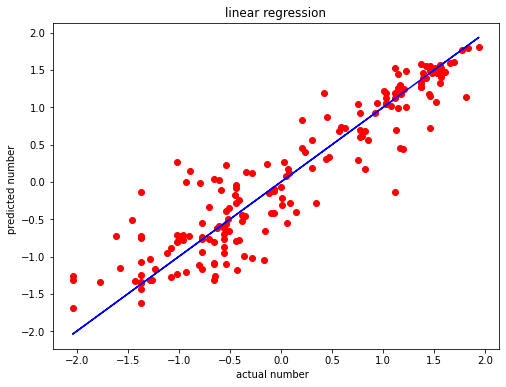

In [213]:
plt.figure(figsize = (8,6))
plt.scatter( x =  y_test , y  = pred_test , color = "r")
plt.plot(y_test, y_test , color = "b")
plt.xlabel("actual number  ")
plt.ylabel("predicted number  ")
plt.title("linear regression")

# saving model 

In [214]:
import pickle


In [215]:
filename = "capacity_mw.pkl"


In [ ]:
pickle.dump(rmf, open(filename,"wb"))